# Imports


In [1]:
pip install geopy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ipykernel


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install jinja2


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import jinja2
print("jinja2 instalado correctamente 🎉")

jinja2 instalado correctamente 🎉


In [11]:
pip install shap


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items
from typing import List
from datetime import datetime
from dateutil import relativedelta

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
import numpy as np
from scipy.spatial.distance import cdist

import pandas as pd
from scipy.spatial import KDTree
from geopy.distance import geodesic

from datetime import timedelta

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import shap

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1.-Business Understanding

In [13]:
# Hecho previamente en Obsidian

# Import Data

In [14]:
PATH1 = '/Users/fernandoarroyo/Desktop/Proyectos Jean-Anna/1.-ZF Datathon - Motortec/Data_Part1_Datathon.csv'
PATH2 = '/Users/fernandoarroyo/Desktop/Proyectos Jean-Anna/1.-ZF Datathon - Motortec/Data_Part2_APG_Datathon.csv'

df1 = pd.read_csv(PATH1)
df2 = pd.read_csv(PATH2)

# 2.-Data Understanding/EDA

In [ ]:
#### ¿Cuál es la mejor forma de organizar el directorio/carpeta del proyecto? ####
#### Es necesario crear un entorno espcífico para cada proyecto ####
#### Nunca he sabido cuántos tipos de gráficos hay (Histograma, boxplot, scatterplot, etc) ni cuál es mejor para según que tipo de datos ####
#### ¿Cómo sabes que lo has analizado todo?, es decir, ¿tenemos que hacer un .info(), .describe(), .unique(), value_counts() por cada columna? ####
#### ¿Cuál es el mejor gráfico para cada tipo de dato/columna? ####
#### No sé a partir de qué % se considera que hay columnas correlacionadas, ¿a partir de 0.80, 0.90? ####
#### ¿En que casos es necesario Estandarizar o Normalizar los datos? ####
#### ¿Cómo podría hacer un Pipeline de todo lo que se hace en este proyecto? ¿qué utilidad tendría hacer esa Pipeline o en estos proyectos es mejor hacer un Notebook?

## EDA: DF1

In [16]:
df1.head()

,Is_toll_removed,Vehicle_Id,Trip_Id,VehicleCategory,SourceCustomerId,Time,Latitude,Longitude,m_marker,Bin_Time,Bin_Position,Odo,Speed,Tfu,distance_diff,time_diff,fuel_diff,odo_diff
0,0,1994,1,10.0,55,00:16:55,41.4782,2.0449,91678.31838,00:00:00,90000.0,893590,72,195744,0.00000,0.0,0.0,0.0
1,0,1994,1,10.0,55,00:19:01,41.4881,2.0726,94583.32565,00:00:00,90000.0,893593,92,195747,2905.00727,126.0,3.0,3.0
2,0,1994,2,10.0,55,06:36:40,41.5076,2.1316,100141.99998,06:30:00,100000.0,893700,43,195807,0.00000,0.0,0.0,0.0
3,0,1995,1,10.0,55,23:22:12,41.4768,2.0425,91400.26743,23:00:00,90000.0,884417,76,112591,0.00000,0.0,0.0,0.0
4,0,2330,1,13.0,29,12:08:51,41.5586,2.2549,112840.67112,12:00:00,110000.0,337908,84,199858,0.00000,0.0,0.0,0.0


In [17]:
# Parece que solo hay valores numéricos y no categóricos.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60869 entries, 0 to 60868
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Is_toll_removed   60869 non-null  int64  
 1   Vehicle_Id        60869 non-null  int64  
 2   Trip_Id           60869 non-null  int64  
 3   VehicleCategory   60869 non-null  float64
 4   SourceCustomerId  60869 non-null  int64  
 5   Time              60869 non-null  object 
 6   Latitude          60869 non-null  float64
 7   Longitude         60869 non-null  float64
 8   m_marker          60869 non-null  float64
 9   Bin_Time          60869 non-null  object 
 10  Bin_Position      60869 non-null  float64
 11  Odo               60869 non-null  int64  
 12  Speed             60869 non-null  int64  
 13  Tfu               60869 non-null  int64  
 14  distance_diff     60869 non-null  float64
 15  time_diff         60869 non-null  float64
 16  fuel_diff         60869 non-null  float6

In [19]:
# Hay dos Variables categóricas (type: object). Tipo object → deben convertirse a datetime o timedelta para análisis por hora.

In [20]:
df1.describe()

,Is_toll_removed,Vehicle_Id,Trip_Id,VehicleCategory,SourceCustomerId,Latitude,Longitude,m_marker,Bin_Position,Odo,Speed,Tfu,distance_diff,time_diff,fuel_diff,odo_diff
count,60869.000000,60869.000000,60869.000000,60869.000000,60869.000000,60869.000000,60869.000000,60869.000000,60869.000000,6.086900e+04,60869.000000,6.086900e+04,60869.000000,60869.000000,60869.000000,60869.00000
mean,0.757578,413972.916312,1.278220,4.051373,1022.566775,41.694300,2.284494,126355.090272,121338.283855,3.706791e+05,73.301533,2.135433e+05,2396.664045,115.639439,1.311899,2.38688
std,0.428552,142709.695982,0.545422,4.532923,597.980439,0.376605,0.524830,70509.315672,70500.513421,3.133884e+05,27.066757,3.172215e+05,1477.900948,63.501139,1.250640,1.53292
min,0.000000,1994.000000,1.000000,1.000000,10.000000,41.137000,1.217500,10.384290,0.000000,-1.000000e+00,0.000000,-1.000000e+00,-953.602410,0.000000,0.000000,0.00000
25%,1.000000,327899.000000,1.000000,1.000000,648.000000,41.433100,1.839600,69522.816060,60000.000000,1.289130e+05,77.000000,6.481900e+04,1171.638670,123.000000,0.000000,1.00000
50%,1.000000,440101.000000,1.000000,1.000000,968.000000,41.566600,2.278230,115042.822770,110000.000000,2.917900e+05,85.000000,1.566610e+05,2950.766550,127.000000,1.000000,3.00000
75%,1.000000,517362.000000,1.000000,6.000000,1396.000000,42.012400,2.811600,190698.700110,190000.000000,5.191700e+05,89.000000,2.841210e+05,3182.061450,136.000000,2.000000,3.00000
max,1.000000,622395.000000,6.000000,19.000000,2671.000000,42.465000,2.946300,248121.777680,240000.000000,2.225340e+06,183.000000,7.062873e+06,25721.285150,999.000000,16.000000,25.00000


In [21]:
# Los datos no contienen información de fecha real o calendario 
# (como días de la semana, días del mes o meses del año), por tanto no podemos saber en qué día o mes 
# se realizaron los trayectos. Solo sabemos cuánto tiempo pasó desde el inicio de cada trayecto o medición.

In [22]:
# La Variable "Odo" indica los kms recorridos en toda la vida del vehículo y se ve que hay en esa columna el valor minimo es -1. No se puede recorrer -1Km.

# Vehicle_Id: indica IDs únicos de los camiones. Gran variabilidad. El valor máximo es 622395. Puede indicar que se incluyen muchos vehículos distintos.

# Trip_Id: indica Máximo valor = 6 → Cada vehículo realiza entre 1 y 6 trayectos.

# VehicleCategory: Va de 1 a 19, pero la mediana es 1 → muchos vehículos pertenecen a la misma categoría.

In [23]:
# Comprobar duplicados
df1[df1.duplicated(keep=False)]

,Is_toll_removed,Vehicle_Id,Trip_Id,VehicleCategory,SourceCustomerId,Time,Latitude,Longitude,m_marker,Bin_Time,Bin_Position,Odo,Speed,Tfu,distance_diff,time_diff,fuel_diff,odo_diff


In [24]:
# No hay ninguna Variable/columna con valores duplicados.

In [25]:
# Identificar columnas completamente vacías
columns_all_null = df1.columns[df1.isnull().all()].tolist()
print(columns_all_null)

[]


In [26]:
# No hay ninguna Variable/columna completamente vacia.

In [27]:
# Comprobar Nulos
df1.isnull().sum()

Is_toll_removed     0
Vehicle_Id          0
Trip_Id             0
VehicleCategory     0
SourceCustomerId    0
Time                0
Latitude            0
Longitude           0
m_marker            0
Bin_Time            0
Bin_Position        0
Odo                 0
Speed               0
Tfu                 0
distance_diff       0
time_diff           0
fuel_diff           0
odo_diff            0
dtype: int64

In [28]:
# No existen Nulos en df1.

#### Ahora decido visualizar el contenido de algunas Variables que me parecen importantes.

In [29]:
df1['Is_toll_removed'].unique()

array([0, 1])

In [30]:
df1['Is_toll_removed'].value_counts(normalize=True) * 100

Is_toll_removed
1    75.757775
0    24.242225
Name: proportion, dtype: float64

In [31]:
# El 75,75% de los datos que tenemos representan que ya no hay peajes (1 = sin peajes)

In [32]:
df1['VehicleCategory'].unique()

array([10., 13., 18., 15.,  1.,  3.,  5.,  4., 16.,  8., 14.,  6.,  9.,
       19., 11.,  7., 12.,  2., 17.])

In [33]:
df1['VehicleCategory'].value_counts(normalize=True) * 100

VehicleCategory
1.0     55.893805
6.0     12.704332
8.0      7.054494
14.0     4.342112
4.0      3.704677
2.0      3.149386
3.0      3.057386
18.0     2.789597
7.0      1.700373
9.0      1.486800
13.0     1.181225
15.0     0.893723
5.0      0.785293
11.0     0.601291
16.0     0.284217
19.0     0.261217
10.0     0.072286
12.0     0.034500
17.0     0.003286
Name: proportion, dtype: float64

In [34]:
# Hay Valores (8 en total) dentro de la Variable que no representan ni el 1% del total.

In [35]:
df1['odo_diff'].unique()

array([ 0.,  3.,  4.,  2.,  1.,  6.,  7.,  5., 10.,  8., 15.,  9., 21.,
       13., 23., 11., 14., 12., 20., 17., 18., 16., 25., 24., 19., 22.])

In [36]:
df1['odo_diff'].value_counts(normalize=True) * 100

odo_diff
3.0     50.431254
0.0     19.229821
4.0     12.829191
1.0      8.237362
2.0      7.465212
7.0      0.489576
5.0      0.473147
6.0      0.445218
8.0      0.156073
9.0      0.057501
17.0     0.041072
10.0     0.036143
14.0     0.016429
15.0     0.014786
12.0     0.014786
11.0     0.014786
13.0     0.013143
18.0     0.009857
16.0     0.009857
23.0     0.003286
19.0     0.003286
20.0     0.001643
21.0     0.001643
25.0     0.001643
24.0     0.001643
22.0     0.001643
Name: proportion, dtype: float64

In [37]:
df1['Odo'].unique()

array([893590, 893593, 893700, ...,   1100,   1104,   1402],
      shape=(51511,))

In [38]:
df1['Odo'].value_counts(normalize=True) * 100

Odo
-1         1.286369
 194247    0.032857
 80130     0.031215
 194248    0.029572
 80131     0.029572
             ...   
 497301    0.001643
 497303    0.001643
 497308    0.001643
 497310    0.001643
 1402      0.001643
Name: proportion, Length: 51511, dtype: float64

In [39]:
df1['Speed'].unique()

array([ 72,  92,  43,  76,  84,  24,  86,  85,  83,  87,  88,  81,  65,
        36,  67,  63,  54,  90,  89,  93,  91,  14,  70,  96,  95,  94,
         0,  60,  57,  75,  18,   2,  13,   5,  33,  34,   3,  46,  23,
        40,  66,  35,  39,  20,   8,  17,  58,  79,  77,  68,  62,  80,
        82,  12,  74,  16,  78,  45,  28,  59,  73,  22,  29,  32,  49,
        48,  50,  97, 101, 100,  10,  61,  64,   4,  31,  26,  25,  55,
        52,  11,   1,   6,   9,   7,  47,  44,  51,  15,  19,  56,  42,
        71,  30,  53,  37,  21, 111, 103, 104,  27,  69, 105,  99, 102,
        38,  41,  98, 171, 183, 182, 121, 115, 141, 106, 107, 109, 113,
       122, 110, 112, 114])

In [40]:
df1['Speed'].value_counts(normalize=True) * 100

Speed
89     18.194812
90     10.943173
88      6.067128
85      4.769259
84      4.741330
         ...    
115     0.001643
121     0.001643
183     0.001643
171     0.001643
114     0.001643
Name: proportion, Length: 121, dtype: float64

In [41]:
df1['fuel_diff'].unique()

array([ 0.,  3.,  2.,  1.,  4.,  5.,  9.,  6.,  8.,  7., 12., 10., 13.,
       11., 14., 15., 16.])

In [42]:
df1['fuel_diff'].value_counts(normalize=True) * 100

fuel_diff
0.0     31.014145
1.0     29.928206
2.0     23.591648
3.0     10.443740
4.0      3.453318
5.0      1.102367
6.0      0.262860
7.0      0.077215
8.0      0.037786
9.0      0.029572
10.0     0.011500
11.0     0.011500
13.0     0.009857
14.0     0.009857
15.0     0.008214
12.0     0.006571
16.0     0.001643
Name: proportion, dtype: float64

In [43]:
df1['distance_diff'].unique()

array([   0.     , 2905.00727, 3333.35471, ..., 3201.33189, 3237.04874,
       3167.9926 ], shape=(55677,))

In [44]:
df1['distance_diff'].value_counts(normalize=True) * 100

distance_diff
0.00000       8.107575
2880.53061    0.004929
2.06362       0.004929
2882.56788    0.003286
3085.01728    0.003286
                ...   
335.51131     0.001643
3079.84015    0.001643
3064.08016    0.001643
3126.53899    0.001643
3167.99260    0.001643
Name: proportion, Length: 55677, dtype: float64

In [45]:
df1['odo_diff'].unique()

array([ 0.,  3.,  4.,  2.,  1.,  6.,  7.,  5., 10.,  8., 15.,  9., 21.,
       13., 23., 11., 14., 12., 20., 17., 18., 16., 25., 24., 19., 22.])

In [46]:
df1['odo_diff'].value_counts(normalize=True) * 100

odo_diff
3.0     50.431254
0.0     19.229821
4.0     12.829191
1.0      8.237362
2.0      7.465212
7.0      0.489576
5.0      0.473147
6.0      0.445218
8.0      0.156073
9.0      0.057501
17.0     0.041072
10.0     0.036143
14.0     0.016429
15.0     0.014786
12.0     0.014786
11.0     0.014786
13.0     0.013143
18.0     0.009857
16.0     0.009857
23.0     0.003286
19.0     0.003286
20.0     0.001643
21.0     0.001643
25.0     0.001643
24.0     0.001643
22.0     0.001643
Name: proportion, dtype: float64

### Histogramas/Análisis Univariable

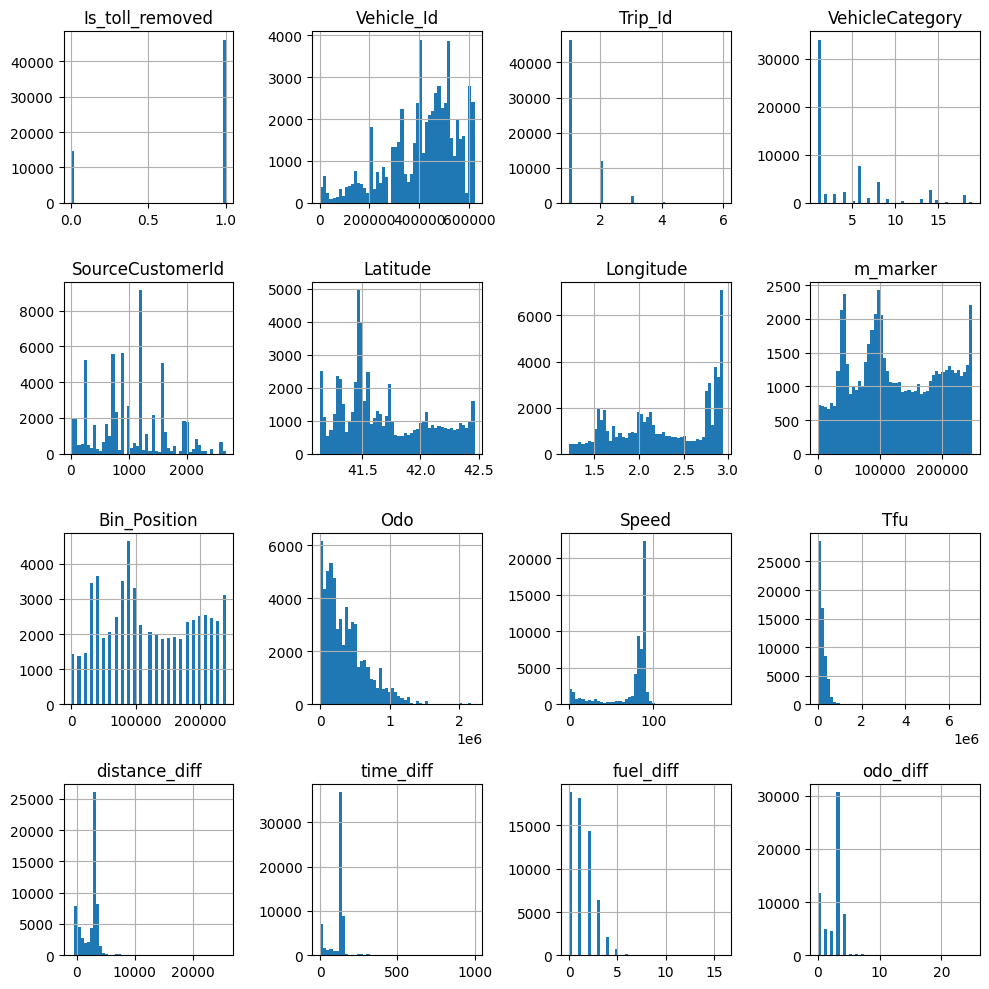

In [47]:
df1.hist(bins=50, figsize=(10, 10))
plt.tight_layout()
plt.show()

<Axes: xlabel='variable', ylabel='value'>

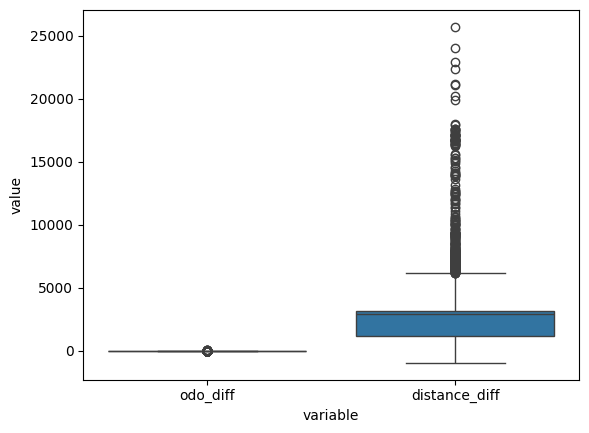

In [48]:
sns.boxplot(data=df1[['odo_diff', 'distance_diff']].melt(), x='variable', y='value')

In [49]:
# El boxplot confirma que odo_diff está mucho más concentrado que distance_diff. 
# Esto sugiere que el odómetro registra distancias pequeñas de manera más constante, mientras que el GPS puede mostrar saltos más 
# largos entre tramos, posiblemente por el intervalo de muestreo o errores de señal.

<Axes: xlabel='Speed', ylabel='fuel_diff'>

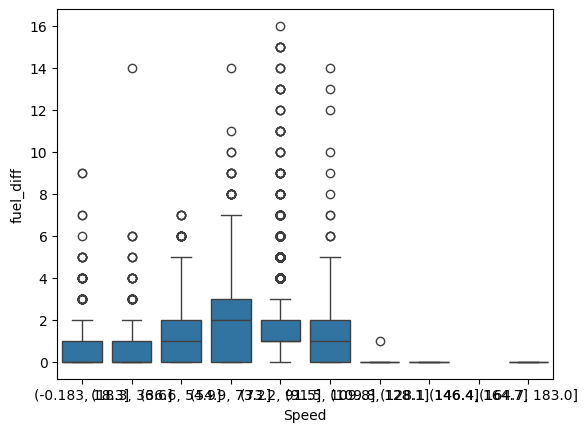

In [50]:
# Relación consumo y velocidad (por tramos)
sns.boxplot(x=pd.cut(df1['Speed'], bins=10), y='fuel_diff', data=df1)

In [51]:
# Parece haber un rango de velocidad óptima donde el consumo es bajo. 
# Velocidades más bajas (por atasco o retenciones) también pueden implicar mayor consumo.

<Axes: xlabel='VehicleCategory', ylabel='Speed'>

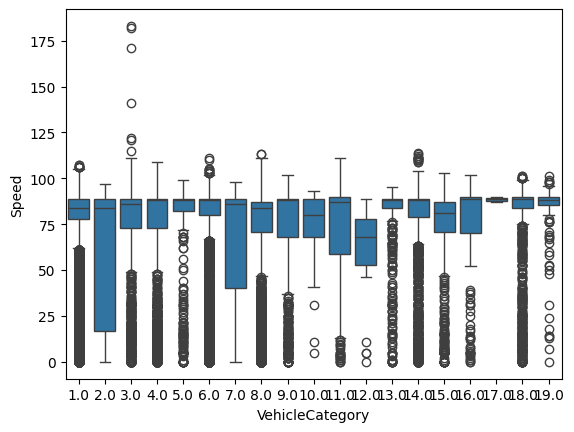

In [52]:
# Comparación de velocidades promedio por categoría de vehículo
sns.boxplot(x='VehicleCategory', y='Speed', data=df1)

<Axes: xlabel='Is_toll_removed', ylabel='Speed'>

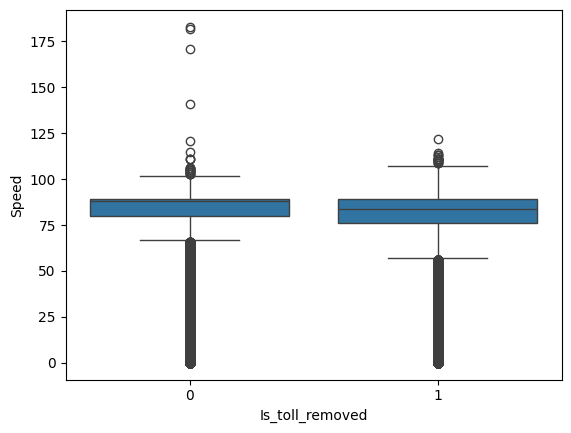

In [53]:
sns.boxplot(x='Is_toll_removed', y='Speed', data=df1)

In [54]:
# Se observa que la mediana de velocidad es superior cuando los peajes han sido eliminados (Is_toll_removed = 1). 
# Esto indica una circulación más fluida tras la eliminación de los peajes.

<Axes: xlabel='Is_toll_removed', ylabel='distance_diff'>

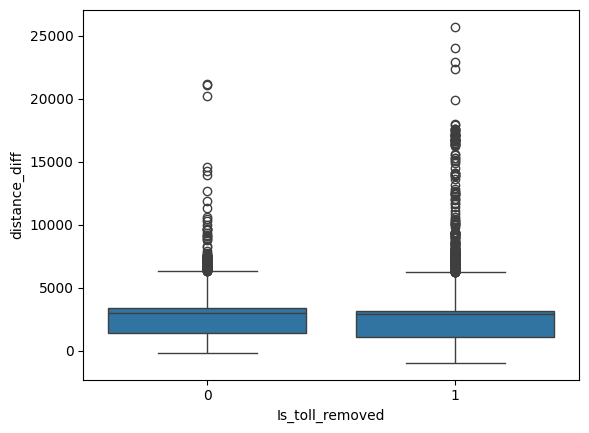

In [55]:
sns.boxplot(x='Is_toll_removed', y='distance_diff', data=df1)

In [56]:
# La distancia recorrida entre registros (distance_diff) es similar en ambos escenarios. 
# Esto sugiere que los trayectos realizados por los camiones no han cambiado significativamente en longitud tras la eliminación de peajes.

Análisis del consumo de combustible en función de si hay o no peajes. Este es un analisis General de todo el trayecto sin dividirlo por tramos.

<Axes: xlabel='fuel_diff', ylabel='Count'>

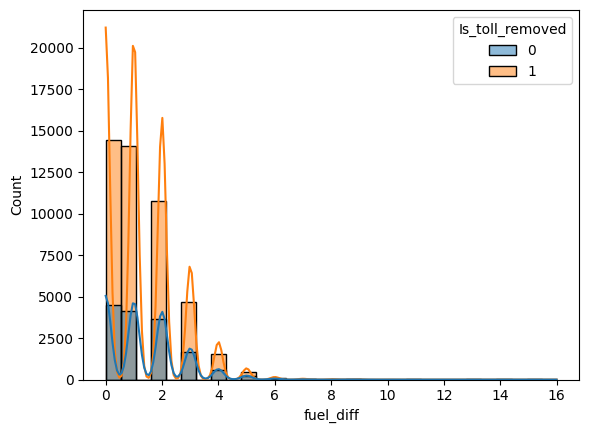

In [57]:
# Histograma comparativo consumo con/sin peajes
sns.histplot(data=df1, x='fuel_diff', hue='Is_toll_removed', bins=30, kde=True)

In [58]:
# El consumo medio de combustible (fuel_diff) es ligeramente inferior cuando no hay peajes. 
# Esto se ve tanto en la menor altura de la caja (boxplot), como en la barra más baja (barplot) y el desplazamiento hacia la izquierda de la distribución (kdeplot).

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2291505802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df1, palette=['#FF6F61', '#6BA292'])


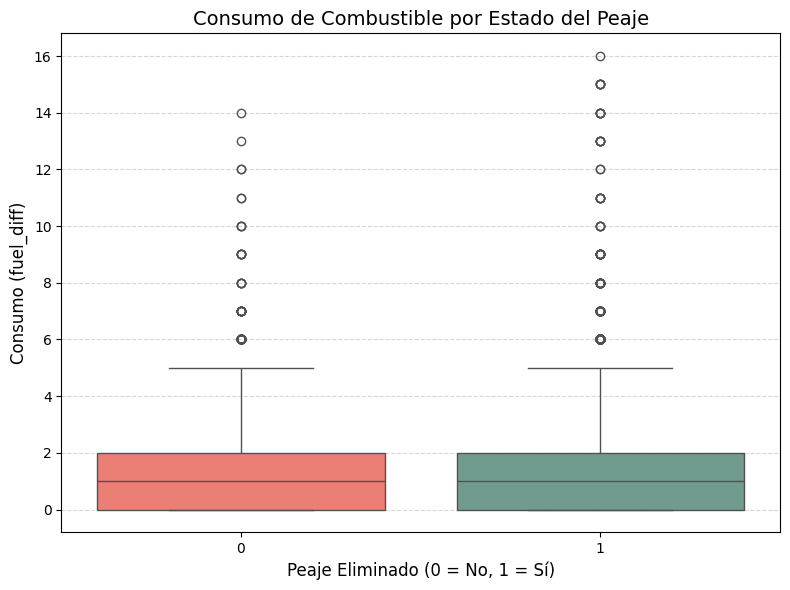

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df1, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo de Combustible por Estado del Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo (fuel_diff)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/1028358093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])


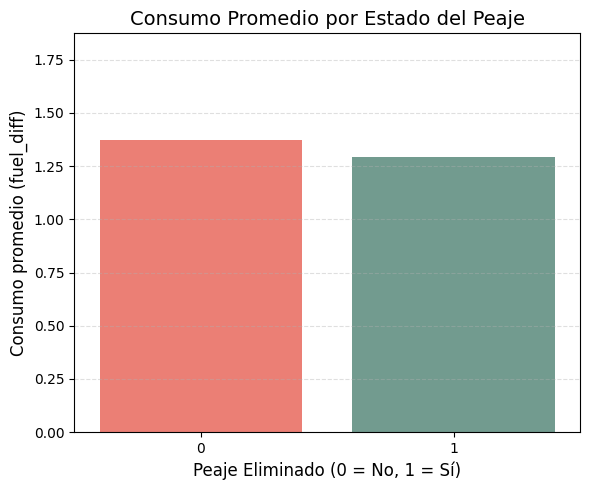

In [60]:
# Calcular medias de consumo
fuel_means = df1.groupby('Is_toll_removed')['fuel_diff'].mean().reset_index()

# Graficar
plt.figure(figsize=(6, 5))
sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo Promedio por Estado del Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo promedio (fuel_diff)", fontsize=12)
plt.ylim(0, fuel_means['fuel_diff'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/1108406525.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1[df1['Is_toll_removed'] == 0]['fuel_diff'], label='Con peaje (0)', shade=True, color='#FF6F61')
/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/1108406525.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1[df1['Is_toll_removed'] == 1]['fuel_diff'], label='Sin peaje (1)', shade=True, color='#6BA292')


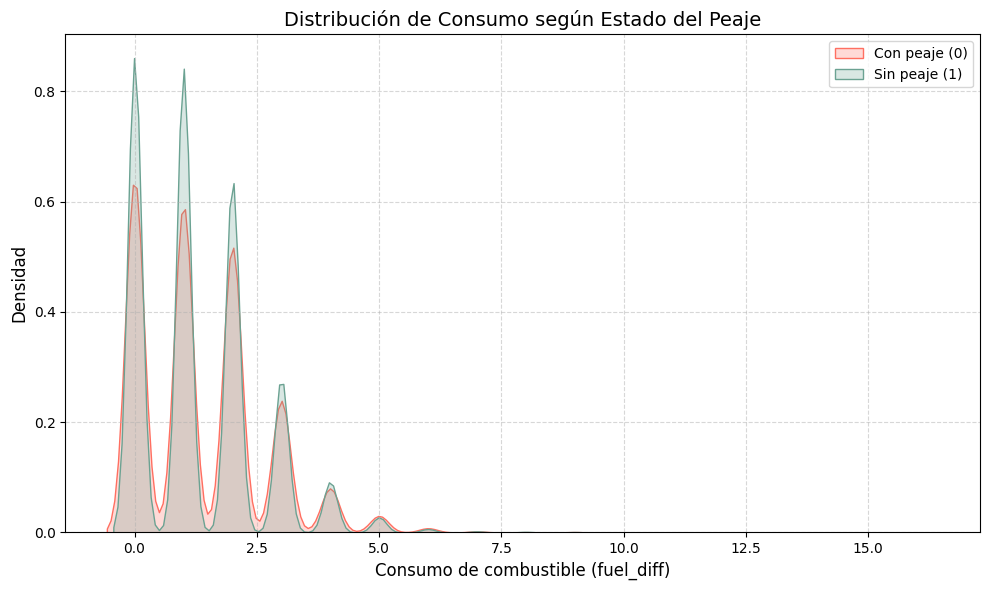

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1[df1['Is_toll_removed'] == 0]['fuel_diff'], label='Con peaje (0)', shade=True, color='#FF6F61')
sns.kdeplot(data=df1[df1['Is_toll_removed'] == 1]['fuel_diff'], label='Sin peaje (1)', shade=True, color='#6BA292')
plt.title("Distribución de Consumo según Estado del Peaje", fontsize=14)
plt.xlabel("Consumo de combustible (fuel_diff)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [62]:
# Conclusión: el consumo de combustible (fuel_diff) parece ser ligeramente menor cuando no hay peaje (Is_toll_removed = 1).
# Hay un cambio visible en la distribución y densidad de los valores más frecuentes (0–3 litros).

<Axes: xlabel='Bin_Time', ylabel='Bin_Position'>

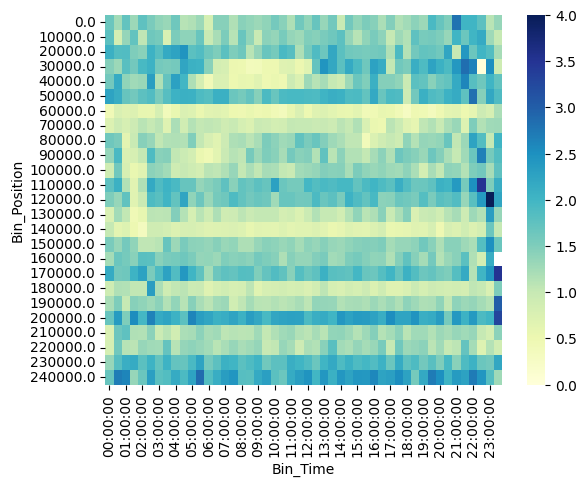

In [63]:
# Mapa de calor: consumo por tramo y hora
pivot = df1.pivot_table(index='Bin_Position', columns='Bin_Time', values='fuel_diff', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')

Vamos a realizar una prueba estadística (t-test) para comparar si existe una diferencia estadísticamente significativa en el consumo de combustible (fuel_diff) antes y después de eliminar los peajes (Is_toll_removed).

	•	Si p-valor < 0.05 → puedes afirmar con un 95% de confianza que la diferencia observada no es por azar y los peajes tienen efecto en el consumo.
	•	Si p-valor >= 0.05 → la diferencia que ves en los gráficos puede deberse al azar.

In [64]:
from scipy.stats import ttest_ind

# Separar los dos grupos
grupo_peaje = df1[df1['Is_toll_removed'] == 0]['fuel_diff']
grupo_sin_peaje = df1[df1['Is_toll_removed'] == 1]['fuel_diff']

# Prueba t de Student
t_stat, p_valor = ttest_ind(grupo_peaje, grupo_sin_peaje, equal_var=False)  # Welch's t-test (más robusto)

# Mostrar resultados
print(f"T-statistic: {t_stat:.4f}")
print(f"P-valor: {p_valor:.6f}")

# Interpretación rápida
if p_valor < 0.05:
    print("✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes.")
else:
    print("❌ No hay diferencia estadísticamente significativa en el consumo.")

T-statistic: 6.7408
P-valor: 0.000000
✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes.


#### Histogramas Tarragona - Barcelona

Análisis del consumo de combustible en función de si hay o no peajes y de la ruta Tarragona - Barcelona.

Desde m_marker = 0 hasta m_marker = 80000

Este análisis corresponde exclusivamente al tramo Tarragona–Barcelona. Permite verificar si el patrón de ahorro en combustible y mejora en velocidad tras la eliminación del peaje también se mantiene de forma localizada.

In [65]:
# Filtrar solo registros entre Tarragona y Barcelona (m_marker <= 80000)
df_tb = df1[df1['m_marker'] <= 80000].copy()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2835455951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df_tb, palette=['#FF6F61', '#6BA292'])


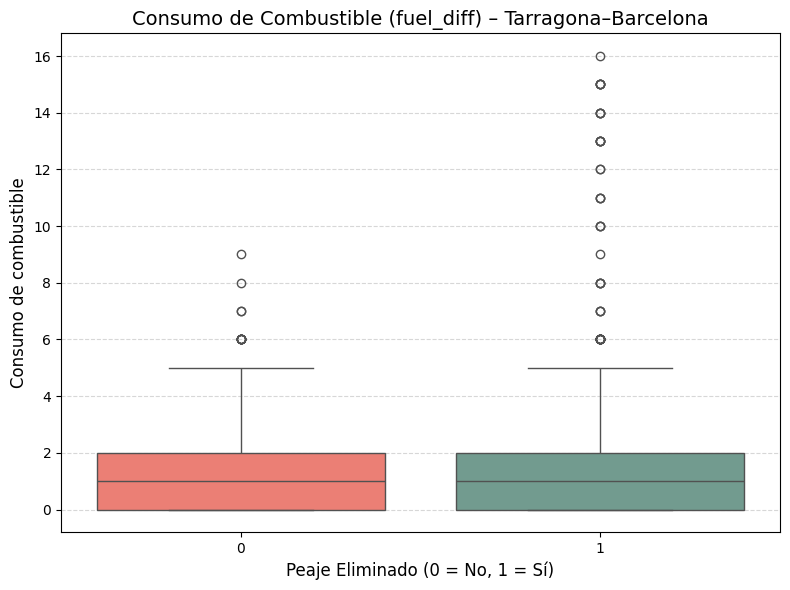

In [66]:
# Consumo de combustible (fuel_diff) por estado del peaje
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df_tb, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo de Combustible (fuel_diff) – Tarragona–Barcelona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo de combustible", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/107002521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])


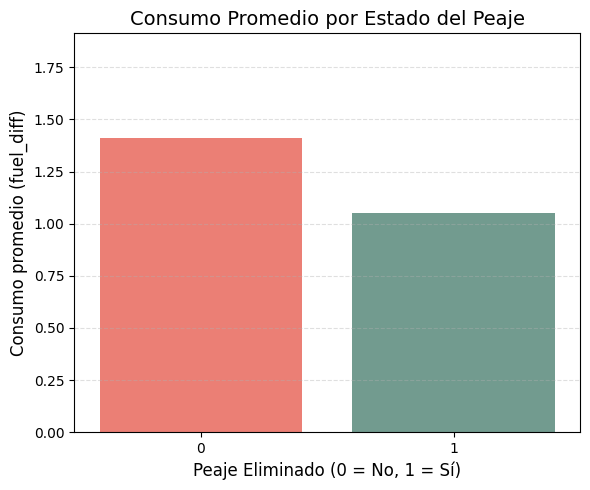

In [67]:
# Calcular medias de consumo
fuel_means = df_tb.groupby('Is_toll_removed')['fuel_diff'].mean().reset_index()

# Graficar
plt.figure(figsize=(6, 5))
sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo Promedio por Estado del Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo promedio (fuel_diff)", fontsize=12)
plt.ylim(0, fuel_means['fuel_diff'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [68]:
# Hay mucha más diferencia en el consumo de combustible cuando No hay peajes en este Tramo Tarragona - Barcelona que si analisamos toda la ruta completa.

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2039571827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='Speed', data=df_tb, palette=['#FF6F61', '#6BA292'])


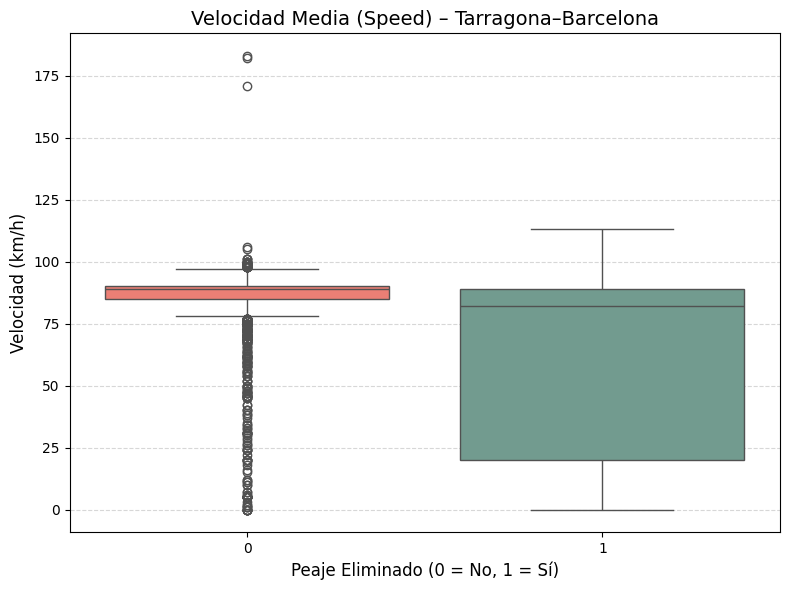

In [69]:
# Velocidad (Speed) por estado del peaje
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='Speed', data=df_tb, palette=['#FF6F61', '#6BA292'])
plt.title("Velocidad Media (Speed) – Tarragona–Barcelona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Velocidad (km/h)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/477619219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='distance_diff', data=df_tb, palette=['#FF6F61', '#6BA292'])


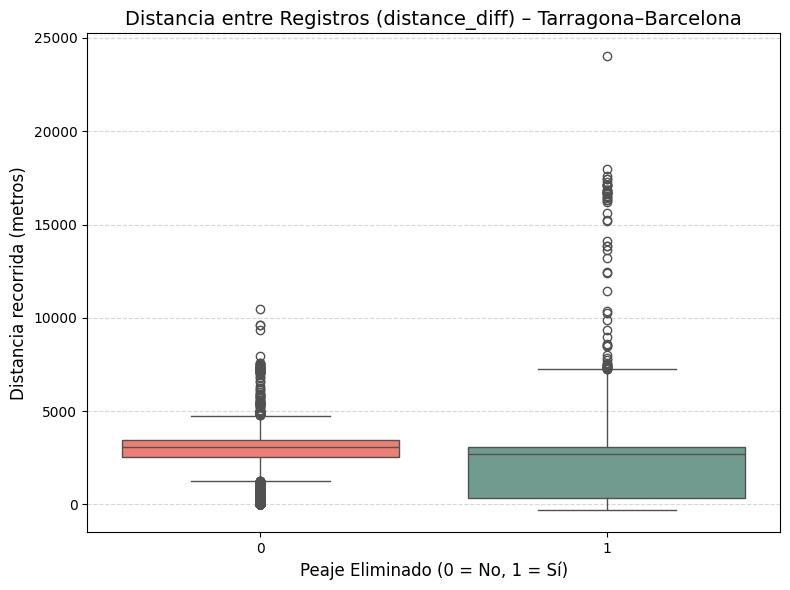

In [70]:
# Distancia recorrida entre registros (distance_diff) por estado del peaje
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='distance_diff', data=df_tb, palette=['#FF6F61', '#6BA292'])
plt.title("Distancia entre Registros (distance_diff) – Tarragona–Barcelona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Distancia recorrida (metros)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

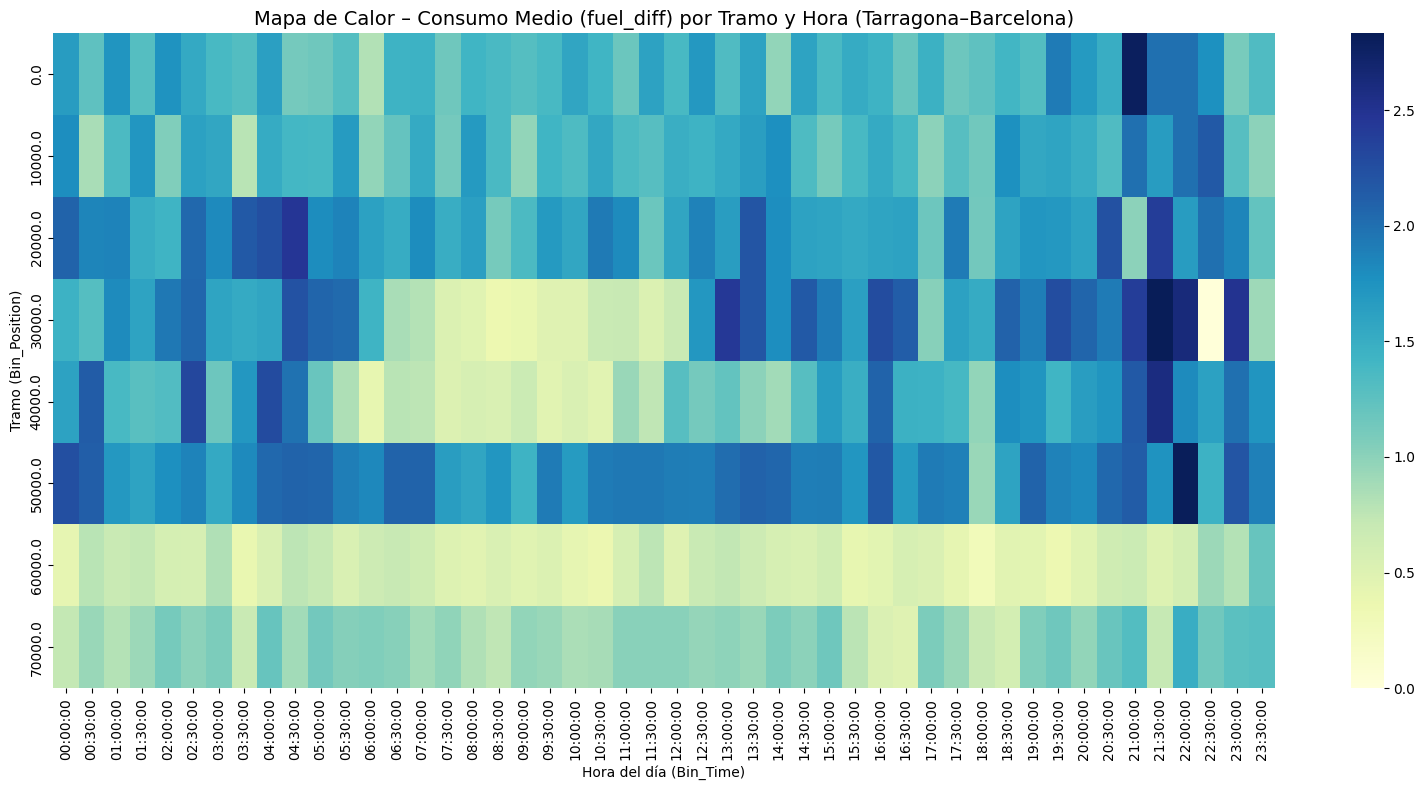

In [71]:
# Mapa de calor: consumo por tramo y hora (Tarragona – Barcelona)
# Crear tabla pivote de consumo medio
pivot_tb = df_tb.pivot_table(
    index='Bin_Position', 
    columns='Bin_Time', 
    values='fuel_diff', 
    aggfunc='mean'
)

# Gráfico
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_tb, cmap='YlGnBu')
plt.title("Mapa de Calor – Consumo Medio (fuel_diff) por Tramo y Hora (Tarragona–Barcelona)", fontsize=14)
plt.xlabel("Hora del día (Bin_Time)")
plt.ylabel("Tramo (Bin_Position)")
plt.tight_layout()
plt.show()

In [72]:
# t-test de diferencia de medias en el tramo Tarragona – Barcelona

# 1. Filtrar tramo Tarragona – Barcelona
df_tb = df1[df1['m_marker'] <= 80000].copy()

# 2. Separar los grupos
grupo_peaje_tb = df_tb[df_tb['Is_toll_removed'] == 0]['fuel_diff']
grupo_sin_peaje_tb = df_tb[df_tb['Is_toll_removed'] == 1]['fuel_diff']

# 3. Welch's t-test (por si varian las varianzas)
t_stat_tb, p_valor_tb = ttest_ind(grupo_peaje_tb, grupo_sin_peaje_tb, equal_var=False)

# 4. Resultados
print(f"T-statistic (Tarragona–Barcelona): {t_stat_tb:.4f}")
print(f"P-valor (Tarragona–Barcelona): {p_valor_tb:.6f}")

if p_valor_tb < 0.05:
    print("✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes (Tarragona–Barcelona).")
else:
    print("❌ No hay diferencia estadísticamente significativa en el consumo (Tarragona–Barcelona).")

T-statistic (Tarragona–Barcelona): 14.8717
P-valor (Tarragona–Barcelona): 0.000000
✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes (Tarragona–Barcelona).


#### Histogramas Barcelona - Girona

Análisis del consumo de combustible en función de si hay o no peajes y de la ruta Barcelona - Girona.

m_marker > 80000

In [73]:
# Crear nuevo dataframe con datos del tramo Barcelona - Girona
df_bg = df1[df1['m_marker'] > 80000].copy()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/3133547151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df_bg, palette=['#FF6F61', '#6BA292'])


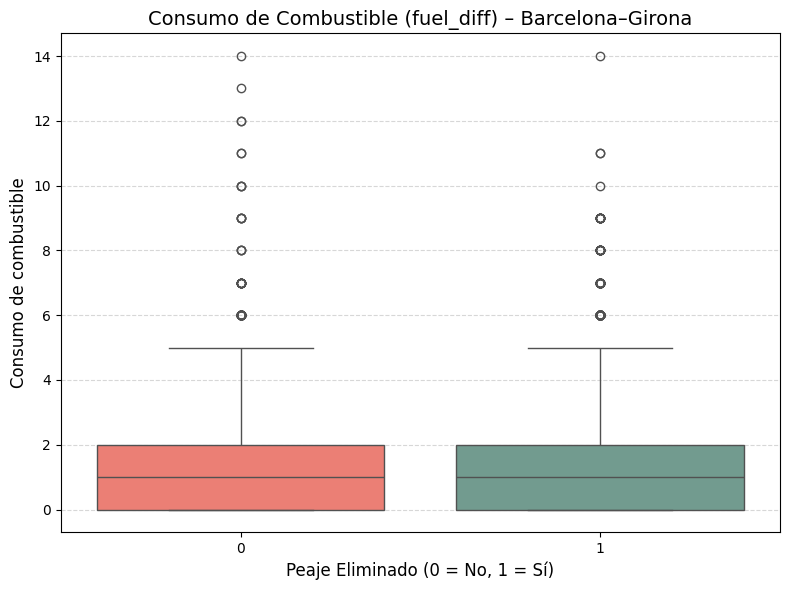

In [74]:
# Consumo de combustible (fuel_diff) por estado del peaje

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='fuel_diff', data=df_bg, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo de Combustible (fuel_diff) – Barcelona–Girona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo de combustible", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2617334902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])


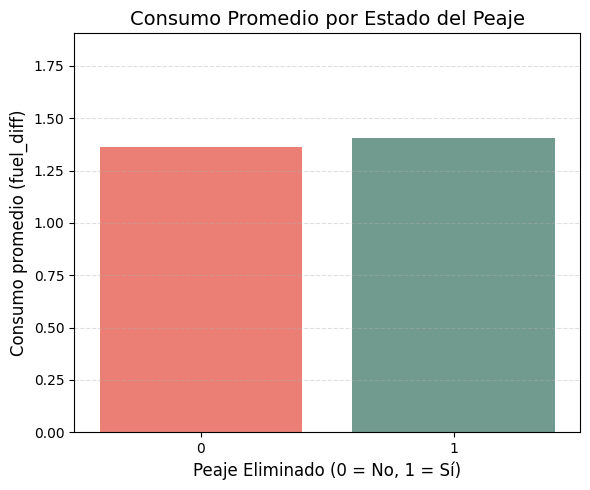

In [75]:
# Calcular medias de consumo
fuel_means = df_bg.groupby('Is_toll_removed')['fuel_diff'].mean().reset_index()

# Graficar
plt.figure(figsize=(6, 5))
sns.barplot(x='Is_toll_removed', y='fuel_diff', data=fuel_means, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo Promedio por Estado del Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo promedio (fuel_diff)", fontsize=12)
plt.ylim(0, fuel_means['fuel_diff'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/1592824627.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='Speed', data=df_bg, palette=['#FF6F61', '#6BA292'])


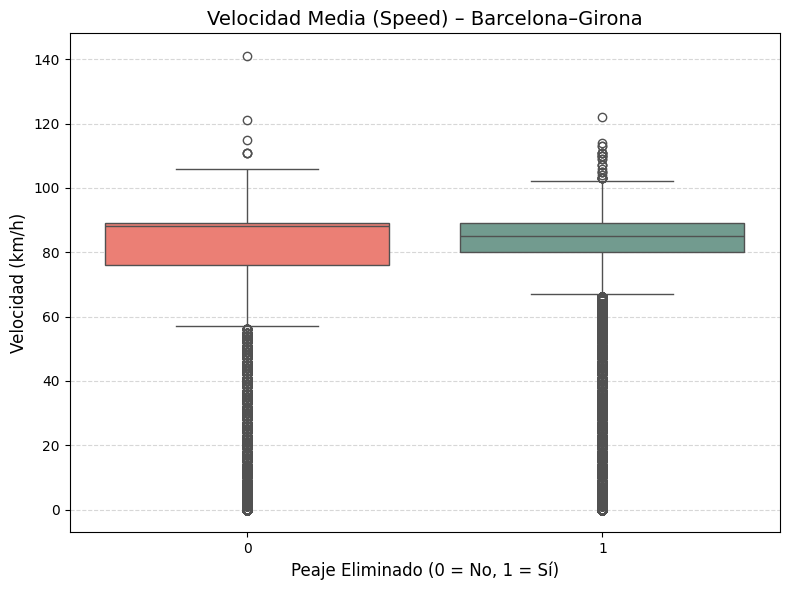

In [76]:
# Velocidad (Speed) por estado del peaje

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='Speed', data=df_bg, palette=['#FF6F61', '#6BA292'])
plt.title("Velocidad Media (Speed) – Barcelona–Girona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Velocidad (km/h)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/1557961956.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='distance_diff', data=df_bg, palette=['#FF6F61', '#6BA292'])


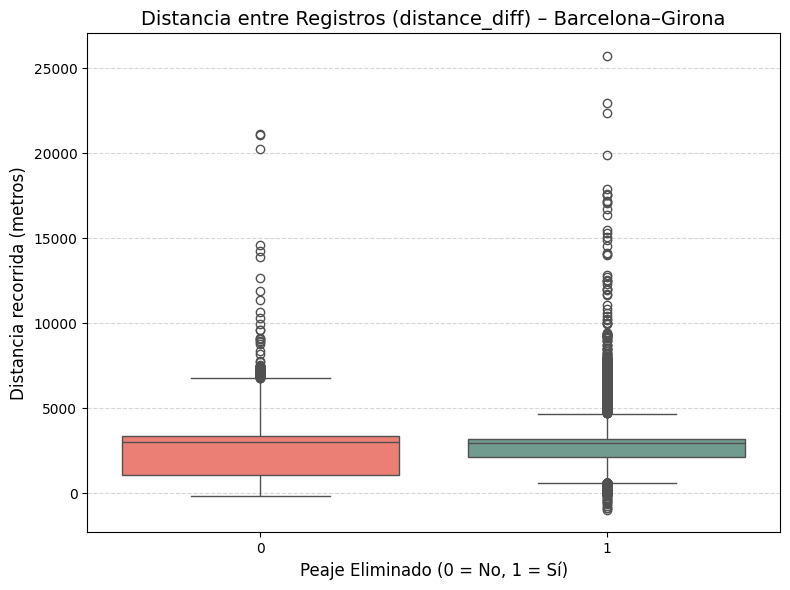

In [77]:
# Distancia recorrida entre registros (distance_diff)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='distance_diff', data=df_bg, palette=['#FF6F61', '#6BA292'])
plt.title("Distancia entre Registros (distance_diff) – Barcelona–Girona", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Distancia recorrida (metros)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

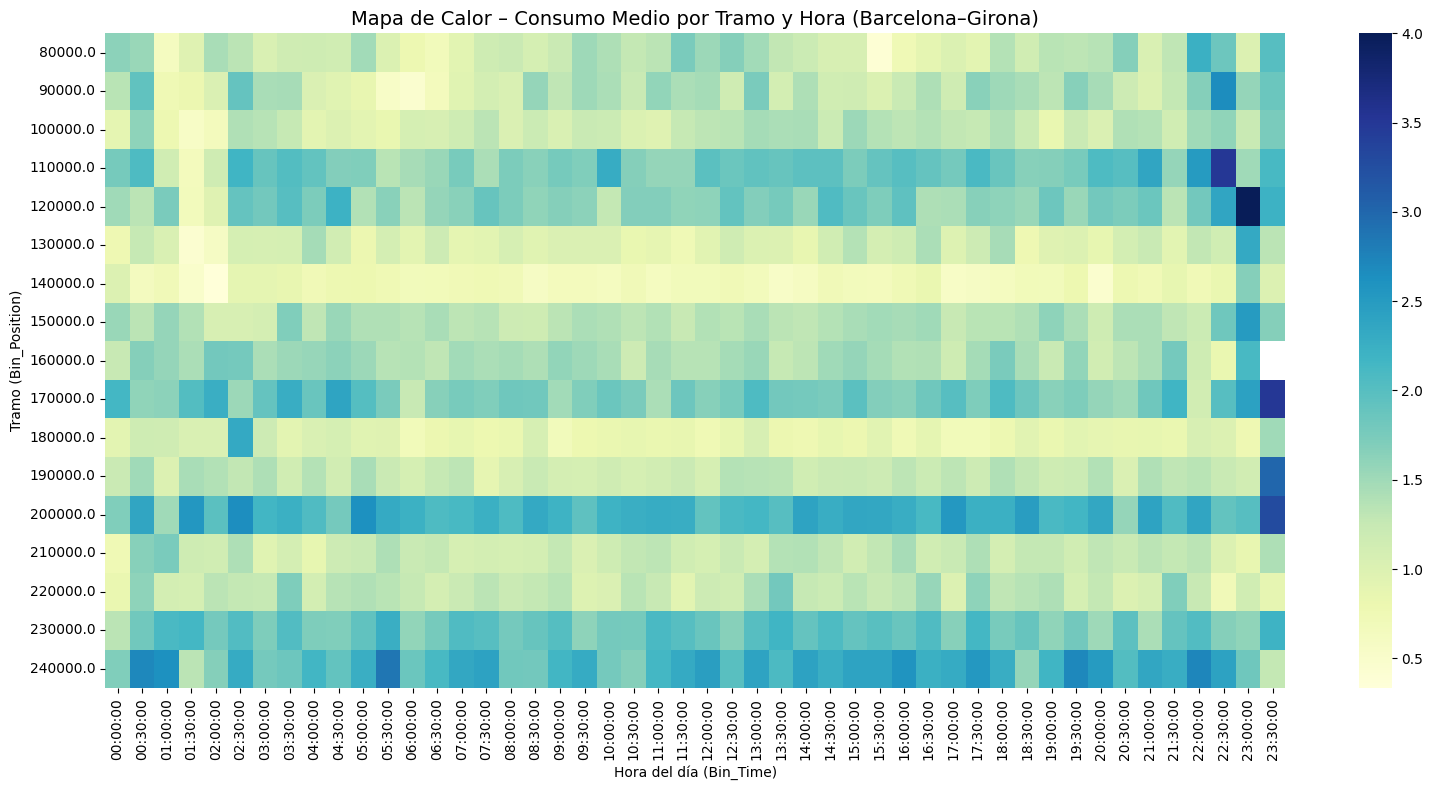

In [78]:
# Crear tabla pivote de consumo medio para Barcelona–Girona
pivot_bg = df_bg.pivot_table(
    index='Bin_Position', 
    columns='Bin_Time', 
    values='fuel_diff', 
    aggfunc='mean'
)

# Gráfico
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_bg, cmap='YlGnBu')
plt.title("Mapa de Calor – Consumo Medio por Tramo y Hora (Barcelona–Girona)", fontsize=14)
plt.xlabel("Hora del día (Bin_Time)")
plt.ylabel("Tramo (Bin_Position)")
plt.tight_layout()
plt.show()

In [79]:
# Test de diferencia de medias (t-test) para fuel_diff

# Separar los grupos
grupo_peaje_bg = df_bg[df_bg['Is_toll_removed'] == 0]['fuel_diff']
grupo_sin_peaje_bg = df_bg[df_bg['Is_toll_removed'] == 1]['fuel_diff']

# Welch's t-test
t_stat_bg, p_valor_bg = ttest_ind(grupo_peaje_bg, grupo_sin_peaje_bg, equal_var=False)

# Resultados
print(f"T-statistic (Barcelona–Girona): {t_stat_bg:.4f}")
print(f"P-valor (Barcelona–Girona): {p_valor_bg:.6f}")

if p_valor_bg < 0.05:
    print("✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes (Barcelona–Girona).")
else:
    print("❌ No hay diferencia estadísticamente significativa en el consumo (Barcelona–Girona).")

T-statistic (Barcelona–Girona): -3.0686
P-valor (Barcelona–Girona): 0.002154
✅ Diferencia estadísticamente significativa en el consumo entre con y sin peajes (Barcelona–Girona).


## EDA: DF2

In [80]:
df2.head()

,start_time,start_time_sec,time,time_sec,distanceMarker,avg_speed,avg_fuel,Is_toll_removed
0,0:0:0,0,0:06:56,416.45,10000.0,86.44,57.41,0
1,0:0:0,0,0:13:41,821.35,20000.0,88.91,52.27,0
2,0:0:0,0,0:20:27,1226.98,30000.0,88.75,75.00,0
3,0:0:0,0,0:27:10,1629.97,40000.0,89.33,75.00,0
4,0:0:0,0,0:30:03,1802.97,44036.7,84.00,30.83,0


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       2123 non-null   object 
 1   start_time_sec   2123 non-null   int64  
 2   time             2123 non-null   object 
 3   time_sec         2123 non-null   float64
 4   distanceMarker   2123 non-null   float64
 5   avg_speed        2123 non-null   float64
 6   avg_fuel         2123 non-null   float64
 7   Is_toll_removed  2123 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 132.8+ KB


In [82]:
df2["start_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2123 entries, 0 to 2122
Series name: start_time
Non-Null Count  Dtype 
--------------  ----- 
2123 non-null   object
dtypes: object(1)
memory usage: 16.7+ KB


In [83]:
df2.describe()

,start_time_sec,time_sec,distanceMarker,avg_speed,avg_fuel,Is_toll_removed
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,37716.910033,42925.313961,104647.714023,79.833683,43.291347,0.505417
std,22166.125234,22245.895143,56190.041096,15.325748,17.019454,0.500088
min,0.000000,392.720000,10000.000000,6.120000,0.000000,0.000000
25%,18000.000000,24644.735000,50000.000000,80.620000,31.370000,0.000000
50%,37800.000000,43507.030000,100000.000000,84.700000,44.540000,1.000000
75%,57600.000000,62028.655000,150000.000000,87.360000,55.260000,1.000000
max,75600.000000,84916.300000,200000.000000,93.380000,100.000000,1.000000


In [84]:
# Comprobar duplicados
df2[df2.duplicated(keep=False)]

,start_time,start_time_sec,time,time_sec,distanceMarker,avg_speed,avg_fuel,Is_toll_removed


In [85]:
# Identificar columnas completamente vacías
columns_all_null = df2.columns[df2.isnull().all()].tolist()
print(columns_all_null)

[]


In [86]:
# Comprobar Nulos
df2.isnull().sum()

start_time         0
start_time_sec     0
time               0
time_sec           0
distanceMarker     0
avg_speed          0
avg_fuel           0
Is_toll_removed    0
dtype: int64

In [87]:
df2['start_time_sec'].unique()

array([    0,  1800,  3600,  5400,  7200,  9000, 10800, 12600, 14400,
       16200, 18000, 19800, 21600, 23400, 25200, 27000, 28800, 30600,
       32400, 34200, 36000, 37800, 39600, 41400, 43200, 45000, 46800,
       48600, 50400, 52200, 54000, 55800, 57600, 59400, 61200, 63000,
       64800, 66600, 68400, 70200, 72000, 73800, 75600])

In [88]:
df2['start_time_sec'].value_counts(normalize=True) * 100

start_time_sec
34200    2.449364
19800    2.449364
25200    2.402261
41400    2.402261
32400    2.402261
30600    2.402261
28800    2.402261
16200    2.402261
18000    2.402261
37800    2.355158
39600    2.355158
36000    2.355158
27000    2.355158
21600    2.355158
23400    2.355158
52200    2.355158
54000    2.355158
55800    2.355158
43200    2.355158
46800    2.308055
50400    2.308055
57600    2.308055
48600    2.308055
59400    2.308055
70200    2.308055
75600    2.308055
45000    2.308055
14400    2.308055
10800    2.308055
64800    2.260951
73800    2.260951
72000    2.260951
3600     2.260951
68400    2.260951
66600    2.260951
61200    2.260951
63000    2.260951
1800     2.260951
5400     2.260951
7200     2.260951
9000     2.260951
12600    2.260951
0        2.260951
Name: proportion, dtype: float64

In [89]:
df2['distanceMarker'].unique()

array([ 10000.  ,  20000.  ,  30000.  ,  40000.  ,  44036.7 ,  50000.  ,
        60000.  ,  70000.  ,  80000.  ,  87626.97,  90000.  , 100000.  ,
       110000.  , 120000.  , 130000.  , 131107.34, 140000.  , 150000.  ,
       160000.  , 170000.  , 174358.83, 180000.  , 190000.  , 200000.  ,
        44489.84,  88019.44, 131113.61, 174811.15,  44513.69,  86797.83,
       128912.15, 173097.52,  43828.5 ,  86938.25, 127841.78, 170298.15,
        43189.19,  85372.65, 123757.94, 163882.28,  44153.37,  83849.5 ,
       123159.33, 165454.35,  42545.85,  85971.75, 106829.62, 146344.  ,
       189802.3 ,  44850.56,  88061.68, 116222.48, 158880.63,  43815.81,
        85734.85, 100250.03, 127553.39, 170114.17,  43780.72,  86421.27,
        93112.9 ,  96170.61, 118813.35, 160269.98,  43449.9 ,  82694.14,
        90375.42,  98584.39, 132263.28, 175600.77,  44366.62,  81715.95,
        88440.14, 101665.47, 137721.58, 180365.63,  42750.02,  80851.73,
        91355.01, 114157.43, 157322.77,  43801.52, 

In [90]:
df2['distanceMarker'].value_counts(normalize=True) * 100

distanceMarker
10000.00     4.050871
110000.00    4.050871
20000.00     4.050871
200000.00    4.050871
180000.00    4.050871
               ...   
114720.38    0.047103
83720.03     0.047103
42795.86     0.047103
161955.31    0.047103
193203.60    0.047103
Name: proportion, Length: 423, dtype: float64

In [91]:
df2['avg_speed'].unique()

array([86.44, 88.91, 88.75, 89.33, 84.  , 89.3 , 89.69, 89.06, 82.  ,
       86.89, 87.75, 88.05, 84.58, 87.62, 86.5 , 90.6 , 89.09, 82.54,
       89.67, 86.6 , 86.33, 84.33, 92.  , 87.4 , 89.  , 87.  , 87.83,
       91.33, 91.  , 78.67, 89.88, 86.73, 79.38, 88.63, 90.67, 85.  ,
       85.5 , 88.5 , 88.  , 88.67, 89.83, 74.5 , 88.25, 81.  , 85.83,
       88.4 , 90.  , 72.69, 87.9 , 89.8 , 89.5 , 86.  , 87.67, 89.44,
       89.62, 89.6 , 88.33, 89.71, 85.92, 81.59, 78.94, 84.78, 84.46,
       73.75, 62.92, 88.62, 87.2 , 80.75, 89.4 , 88.36, 79.73, 87.42,
       90.4 , 77.4 , 88.86, 89.17, 83.17, 75.73, 86.41, 75.25, 76.15,
       88.17, 64.5 , 85.8 , 87.6 , 87.5 , 86.67, 70.5 , 90.33, 83.25,
       73.6 , 81.12, 84.89, 69.  , 79.27, 83.4 , 81.1 , 88.09, 84.21,
       89.23, 87.64, 90.04, 84.43, 85.86, 86.88, 86.13, 90.22, 80.39,
       51.66, 26.61, 57.31, 85.17, 85.41, 85.33, 67.77, 82.82, 86.8 ,
       87.06, 87.86, 87.04, 92.67, 89.2 , 89.25, 84.56, 84.96, 43.49,
       86.9 , 89.12,

In [92]:
df2['avg_speed'].value_counts(normalize=True) * 100

avg_speed
83.17    2.402261
89.00    1.507301
90.00    1.036269
88.00    1.036269
89.50    0.989166
           ...   
82.11    0.047103
87.47    0.047103
79.97    0.047103
78.56    0.047103
36.60    0.047103
Name: proportion, Length: 919, dtype: float64

In [93]:
df2['Is_toll_removed'].unique()

array([0, 1])

In [94]:
df2['Is_toll_removed'].value_counts(normalize=True) * 100

Is_toll_removed
1    50.541686
0    49.458314
Name: proportion, dtype: float64

In [95]:
df2['avg_fuel'].unique()

array([57.41, 52.27, 75.  , ..., 23.61, 26.39, 22.44], shape=(1060,))

In [96]:
df2['avg_fuel'].value_counts(normalize=True) * 100

avg_fuel
44.54    2.355158
0.00     1.742817
33.33    1.507301
50.00    1.365992
66.67    1.083373
           ...   
30.09    0.047103
48.81    0.047103
55.62    0.047103
60.48    0.047103
22.44    0.047103
Name: proportion, Length: 1060, dtype: float64

### Histogramas

Efecto del peaje (Is_toll_removed)

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2001339696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='avg_fuel', data=df2, palette=['#FF6F61', '#6BA292'])


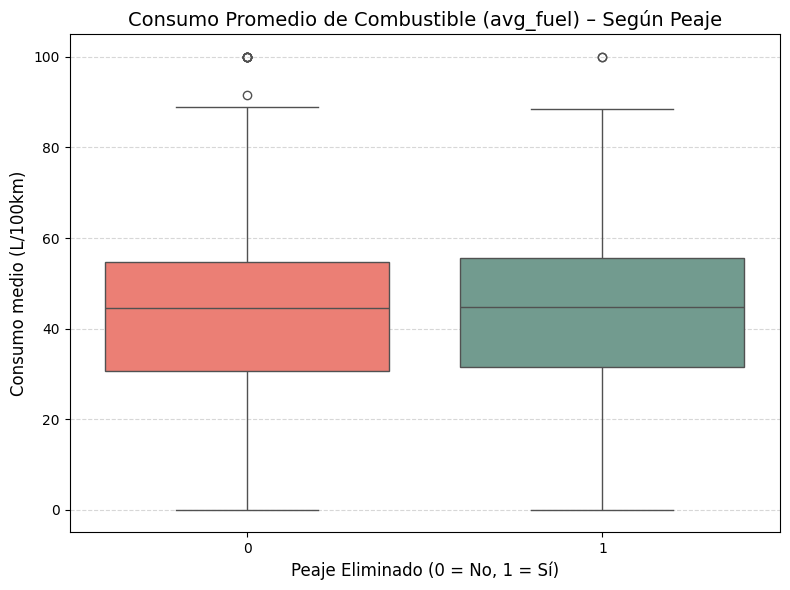

In [97]:
# avg_fuel por Is_toll_removed

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='avg_fuel', data=df2, palette=['#FF6F61', '#6BA292'])
plt.title("Consumo Promedio de Combustible (avg_fuel) – Según Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Consumo medio (L/100km)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/3212104638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_toll_removed', y='avg_speed', data=df2, palette=['#FF6F61', '#6BA292'])


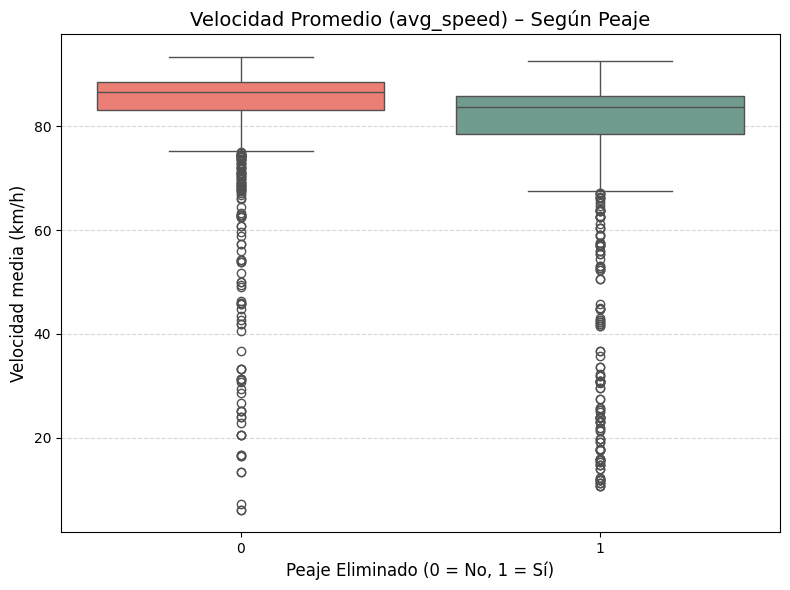

In [98]:
# avg_speed por Is_toll_removed

plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_toll_removed', y='avg_speed', data=df2, palette=['#FF6F61', '#6BA292'])
plt.title("Velocidad Promedio (avg_speed) – Según Peaje", fontsize=14)
plt.xlabel("Peaje Eliminado (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Velocidad media (km/h)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


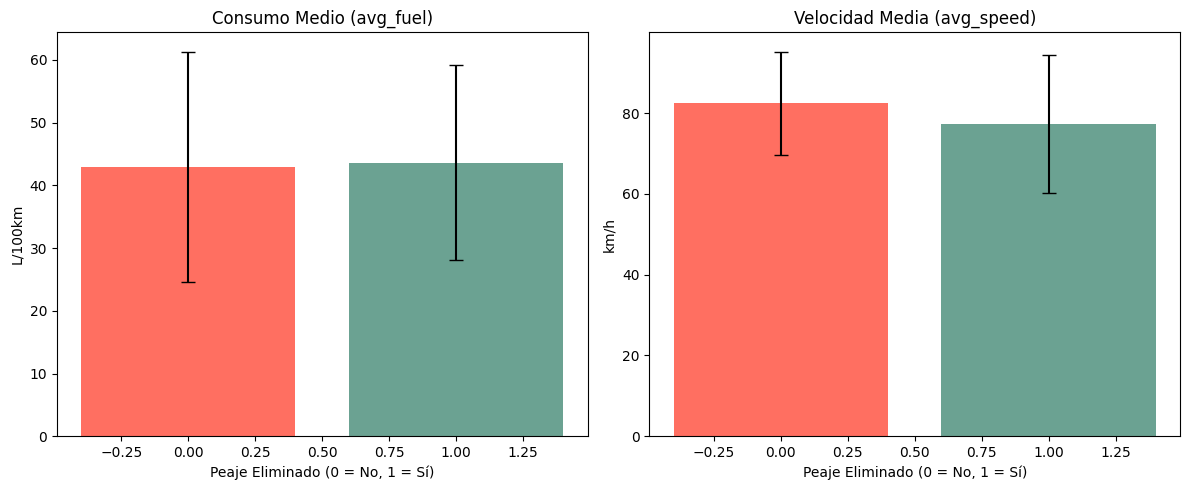

In [99]:
# medias + desviación estándar (avg_fuel y avg_speed)

# Calcular medias y std por grupo
media_std = df2.groupby('Is_toll_removed')[['avg_fuel', 'avg_speed']].agg(['mean', 'std']).reset_index()
media_std.columns = ['Is_toll_removed', 'avg_fuel_mean', 'avg_fuel_std', 'avg_speed_mean', 'avg_speed_std']

# Gráfico barras
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# avg_fuel
ax[0].bar(media_std['Is_toll_removed'], media_std['avg_fuel_mean'],
          yerr=media_std['avg_fuel_std'], capsize=5, color=['#FF6F61', '#6BA292'])
ax[0].set_title("Consumo Medio (avg_fuel)")
ax[0].set_xlabel("Peaje Eliminado (0 = No, 1 = Sí)")
ax[0].set_ylabel("L/100km")

# avg_speed
ax[1].bar(media_std['Is_toll_removed'], media_std['avg_speed_mean'],
          yerr=media_std['avg_speed_std'], capsize=5, color=['#FF6F61', '#6BA292'])
ax[1].set_title("Velocidad Media (avg_speed)")
ax[1].set_xlabel("Peaje Eliminado (0 = No, 1 = Sí)")
ax[1].set_ylabel("km/h")

plt.tight_layout()
plt.show()

/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2578946224.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2['Is_toll_removed'] == 0]['avg_fuel'], label='Con peaje (0)', shade=True, color='#FF6F61')
/var/folders/w6/nd8qf9cs3gd7y6pgctynjljh0000gn/T/ipykernel_27487/2578946224.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df2[df2['Is_toll_removed'] == 1]['avg_fuel'], label='Sin peaje (1)', shade=True, color='#6BA292')


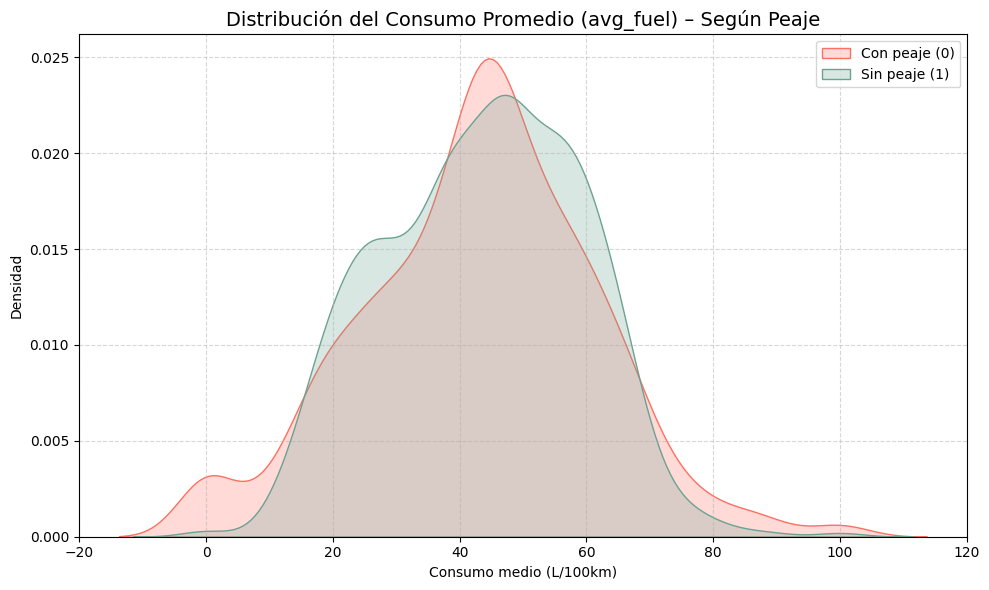

In [100]:
# distribución de avg_fuel por Is_toll_removed

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2[df2['Is_toll_removed'] == 0]['avg_fuel'], label='Con peaje (0)', shade=True, color='#FF6F61')
sns.kdeplot(data=df2[df2['Is_toll_removed'] == 1]['avg_fuel'], label='Sin peaje (1)', shade=True, color='#6BA292')
plt.title("Distribución del Consumo Promedio (avg_fuel) – Según Peaje", fontsize=14)
plt.xlabel("Consumo medio (L/100km)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Comportamiento por tramo (distanceMarker)

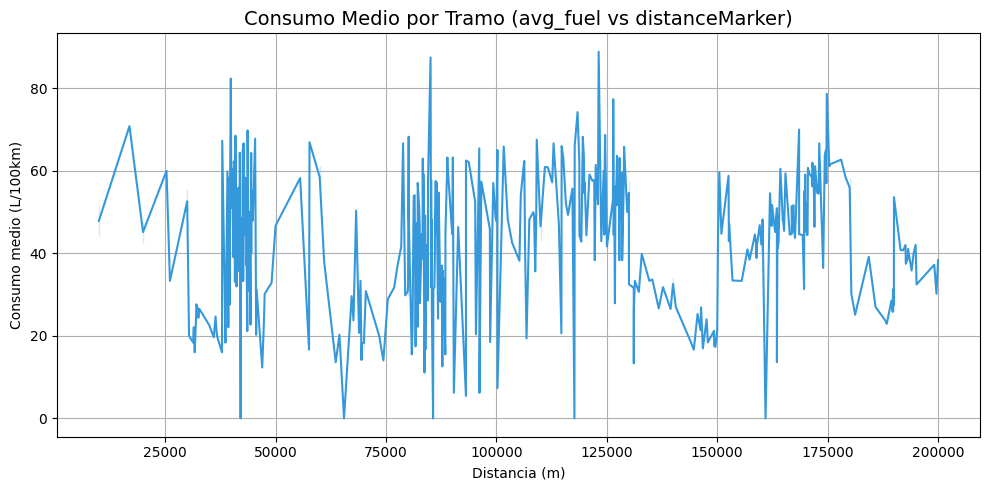

In [101]:
# avg_fuel vs distanceMarker

plt.figure(figsize=(10, 5))
sns.lineplot(x='distanceMarker', y='avg_fuel', data=df2, color='#3498DB')
plt.title("Consumo Medio por Tramo (avg_fuel vs distanceMarker)", fontsize=14)
plt.xlabel("Distancia (m)")
plt.ylabel("Consumo medio (L/100km)")
plt.grid(True)
plt.tight_layout()
plt.show()

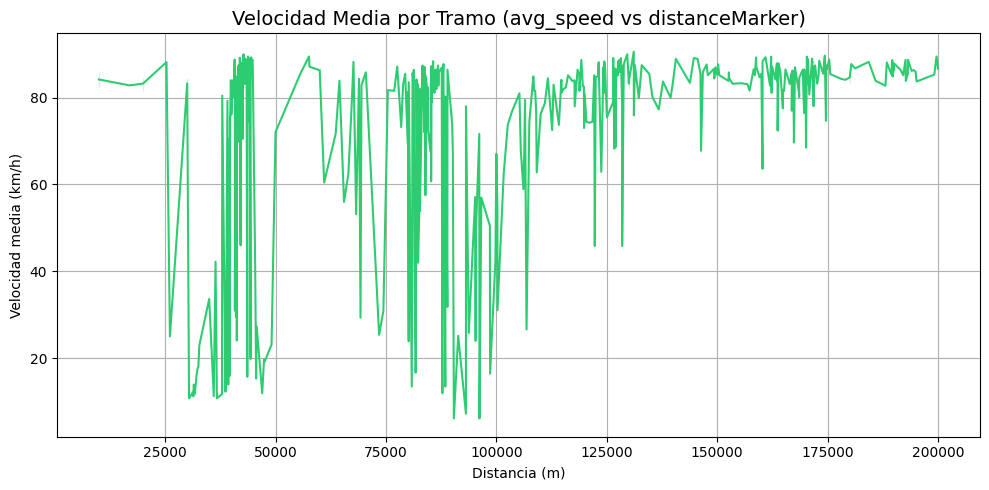

In [102]:
# avg_speed vs distanceMarker

plt.figure(figsize=(10, 5))
sns.lineplot(x='distanceMarker', y='avg_speed', data=df2, color='#2ECC71')
plt.title("Velocidad Media por Tramo (avg_speed vs distanceMarker)", fontsize=14)
plt.xlabel("Distancia (m)")
plt.ylabel("Velocidad media (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()

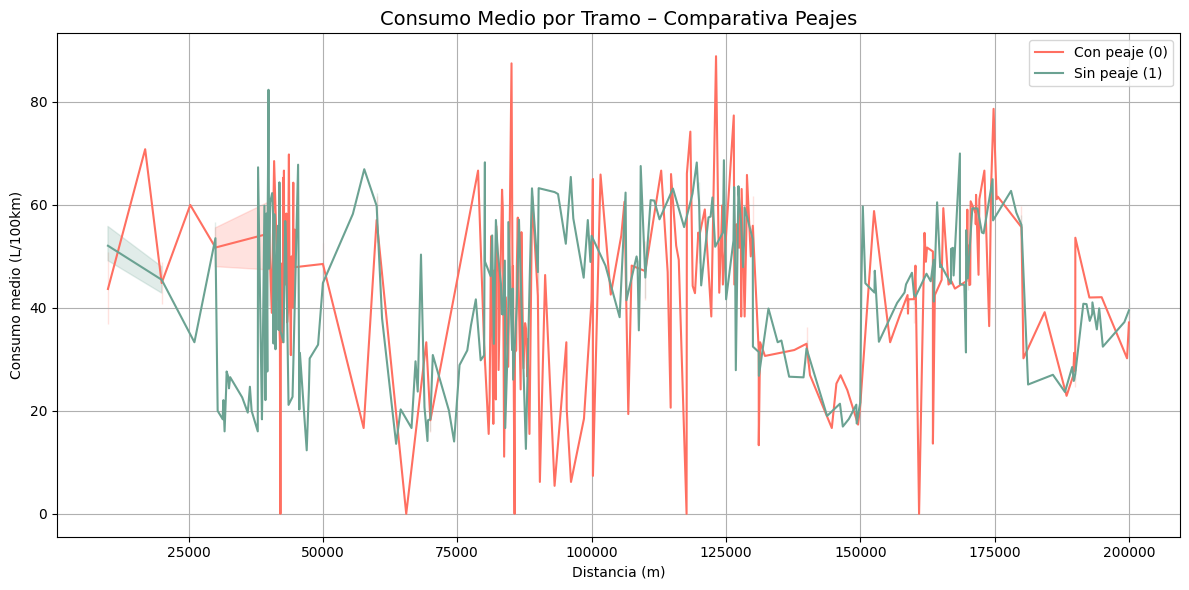

In [103]:
# Comparación de consumo por tramo con/sin peaje

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2[df2['Is_toll_removed'] == 0], x='distanceMarker', y='avg_fuel', label='Con peaje (0)', color='#FF6F61')
sns.lineplot(data=df2[df2['Is_toll_removed'] == 1], x='distanceMarker', y='avg_fuel', label='Sin peaje (1)', color='#6BA292')
plt.title("Consumo Medio por Tramo – Comparativa Peajes", fontsize=14)
plt.xlabel("Distancia (m)")
plt.ylabel("Consumo medio (L/100km)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Comportamiento por hora (start_time_sec)

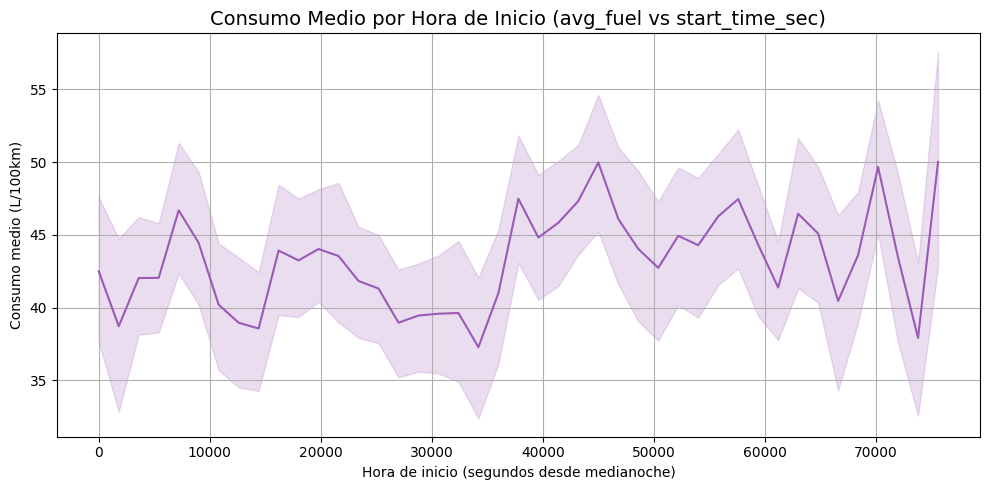

In [104]:
# avg_fuel vs start_time_sec

plt.figure(figsize=(10, 5))
sns.lineplot(x='start_time_sec', y='avg_fuel', data=df2, color='#9B59B6')
plt.title("Consumo Medio por Hora de Inicio (avg_fuel vs start_time_sec)", fontsize=14)
plt.xlabel("Hora de inicio (segundos desde medianoche)")
plt.ylabel("Consumo medio (L/100km)")
plt.grid(True)
plt.tight_layout()
plt.show()

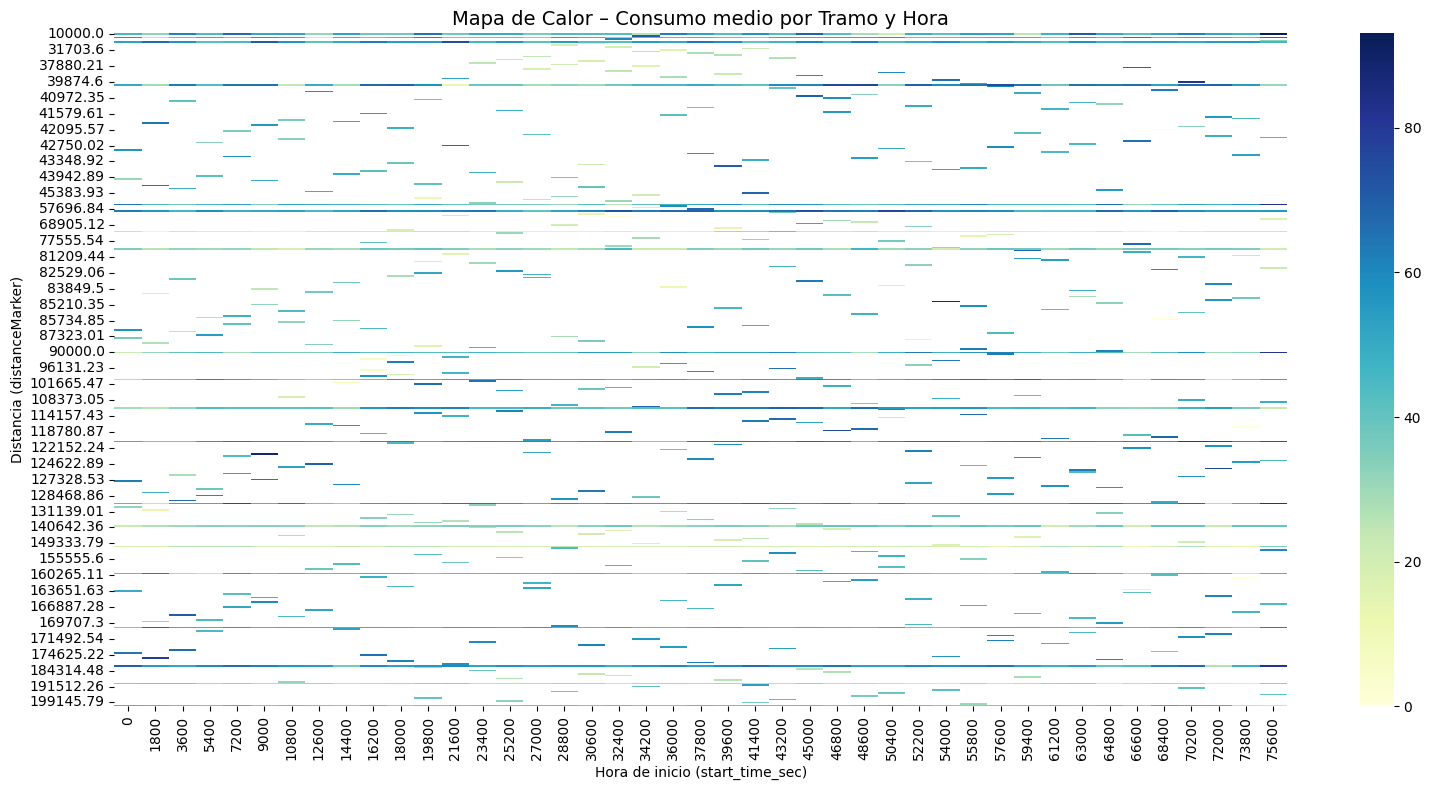

In [105]:
# avg_fuel por start_time_sec y distanceMarker

# Crear tabla pivote
pivot_df = df2.pivot_table(index='distanceMarker', columns='start_time_sec', values='avg_fuel', aggfunc='mean')

# Gráfico
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title("Mapa de Calor – Consumo medio por Tramo y Hora", fontsize=14)
plt.xlabel("Hora de inicio (start_time_sec)")
plt.ylabel("Distancia (distanceMarker)")
plt.tight_layout()
plt.show()

In [106]:
# Resumen del EDA en Obsidian 2.2.-Analisis exploratorio de datos.

# 3.-Data Preparation

## Data Cleaning

NULOS, DUPLCIADOS, ENCONDING, DATETIME/TIMEDELTA

Odo -1 ?

Agrupar valores de Variables/columnas en un mismo grupo porque son poco representativas ??

In [107]:
# cambiar columna "Time", "Bin_Time" y "start_time" de type object a datetime
df1['Time'] = pd.to_timedelta(df1['Time'])
df1['Bin_Time'] = pd.to_timedelta(df1['Bin_Time'])

df2['time'] = pd.to_timedelta(df2['time'])
df2['start_time'] = pd.to_timedelta(df2['start_time'])

In [108]:
print(df1.info(), df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60869 entries, 0 to 60868
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Is_toll_removed   60869 non-null  int64          
 1   Vehicle_Id        60869 non-null  int64          
 2   Trip_Id           60869 non-null  int64          
 3   VehicleCategory   60869 non-null  float64        
 4   SourceCustomerId  60869 non-null  int64          
 5   Time              60869 non-null  timedelta64[ns]
 6   Latitude          60869 non-null  float64        
 7   Longitude         60869 non-null  float64        
 8   m_marker          60869 non-null  float64        
 9   Bin_Time          60869 non-null  timedelta64[ns]
 10  Bin_Position      60869 non-null  float64        
 11  Odo               60869 non-null  int64          
 12  Speed             60869 non-null  int64          
 13  Tfu               60869 non-null  int64          
 14  distan

In [109]:
# Quitamos el valor Odo <= -1 porque no tiene sentido que un vehículo tenga -1km de uso.

df1 = df1[df1['Odo'] != -1]

# 4.- Modelo

Se va a predecir el consumo medio de combustible, es decir, avg_fuel (litros cada 100 km, L/100km). El objetivo es evaluar eficiencia, sostenibilidad o diseño de rutas más económicas.

## Nuevas columnas (features)

Se crean nuevas columnas para aportar más información al modelo.

•	distanceMarker, avg_speed, avg_fuel

•	consumo_por_km = avg_fuel / distanceMarker

•	velocidad_por_hora = distanceMarker / time_sec

•	hora_inicio a partir de start_time_sec, para convertir segundos a hora del día

•	con_peaje_rapido = (Is_toll_removed == 0) & (avg_speed > 90)

Luego se verá con SHAP si estas nuevas columnas ayudan o no.

In [110]:
# 1. Crear columna equivalente a 'distanceMarker'
# Asumimos que es la distancia acumulada (odómetro)
df1['distanceMarker'] = df1['Odo']

# 2. Crear columna 'avg_speed' (velocidad media entre registros)
df1['avg_speed'] = df1['distance_diff'] / (df1['time_diff'] / 3600)  # km/h

# 3. Crear columna 'avg_fuel' (consumo medio entre registros)
df1['avg_fuel'] = df1['fuel_diff'] / (df1['distance_diff'] / 100)  # L/100km

# Evitar divisiones por cero o negativos (opcional)
df1['avg_speed'] = df1['avg_speed'].replace([np.inf, -np.inf], np.nan).fillna(0)
df1['avg_fuel'] = df1['avg_fuel'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 4. Crear columna 'consumo_por_km'
df1['consumo_por_km'] = df1['avg_fuel'] / df1['distanceMarker']
df1['consumo_por_km'] = df1['consumo_por_km'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 5. Crear columna 'velocidad_por_hora'
df1['velocidad_por_hora'] = df1['distanceMarker'] / (df1['Time'].dt.total_seconds() / 3600)
df1['velocidad_por_hora'] = df1['velocidad_por_hora'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 6. Crear columna 'hora_inicio' a partir de Bin_Time o Time (en segundos)
df1['hora_inicio'] = df1['Bin_Time'].dt.total_seconds() // 3600  # Horas del día (0 a 23 aprox)

# 7. Crear columna 'con_peaje_rapido'
df1['con_peaje_rapido'] = ((df1['Is_toll_removed'] == 0) & (df1['avg_speed'] > 90)).astype(int)

# Verificar columnas nuevas
df1[['distanceMarker', 'avg_speed', 'avg_fuel', 'consumo_por_km', 'velocidad_por_hora', 'hora_inicio', 'con_peaje_rapido']].head()

,distanceMarker,avg_speed,avg_fuel,consumo_por_km,velocidad_por_hora,hora_inicio,con_peaje_rapido
0,893590,0.000000,0.00000,0.000000e+00,3.169383e+06,0.0,0
1,893593,83000.207714,0.10327,1.155671e-07,2.819399e+06,0.0,1
2,893700,0.000000,0.00000,0.000000e+00,1.351815e+05,6.0,0
3,884417,0.000000,0.00000,0.000000e+00,3.784412e+04,23.0,0
4,337908,0.000000,0.00000,0.000000e+00,2.781708e+04,12.0,0


In [111]:
# Resetear índices
df1.reset_index(drop=True,inplace=True)

## Matriz de Correlación y Baja Varianza

•	Matriz de correlación: para detectar columnas duplicadas, muy similares o que no aportan valor.

In [112]:
#### Creo que no hay que "balancear los datos" aunque el 75% de los datos son de cuando No hay peajes.

In [113]:
corr = df1.corr(numeric_only=True)

# Visualización con estilo de colores actualizada
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Is_toll_removed,Vehicle_Id,Trip_Id,VehicleCategory,SourceCustomerId,Latitude,Longitude,m_marker,Bin_Position,Odo,Speed,Tfu,distance_diff,time_diff,fuel_diff,odo_diff,distanceMarker,avg_speed,avg_fuel,consumo_por_km,velocidad_por_hora,hora_inicio,con_peaje_rapido
Is_toll_removed,1.00,0.27,0.03,0.08,0.04,-0.04,-0.06,-0.05,-0.05,-0.03,-0.05,0.01,-0.06,-0.04,-0.04,-0.06,-0.03,-0.02,0.00,0.00,0.00,0.09,-0.94
Vehicle_Id,0.27,1.00,0.01,-0.10,0.22,0.04,0.03,0.04,0.04,-0.55,-0.03,-0.30,-0.03,-0.02,-0.04,-0.03,-0.55,-0.01,0.00,0.03,-0.01,0.07,-0.25
Trip_Id,0.03,0.01,1.00,-0.00,0.01,0.29,0.26,0.28,0.28,-0.02,0.07,-0.02,0.04,0.00,0.08,0.04,-0.02,0.03,-0.00,-0.00,-0.01,0.19,-0.03
VehicleCategory,0.08,-0.10,-0.00,1.00,-0.15,0.01,0.01,0.01,0.01,0.15,0.04,0.09,-0.00,-0.01,0.01,-0.00,0.15,0.04,-0.00,0.00,0.00,0.00,-0.08
SourceCustomerId,0.04,0.22,0.01,-0.15,1.00,-0.02,-0.00,-0.01,-0.01,0.05,0.03,0.05,-0.01,-0.02,-0.01,-0.01,0.05,0.04,-0.01,-0.01,-0.00,0.04,-0.03
Latitude,-0.04,0.04,0.29,0.01,-0.02,1.00,0.93,0.99,0.99,-0.04,0.27,-0.02,0.16,0.01,0.17,0.15,-0.04,0.20,-0.01,-0.00,0.01,0.10,0.04
Longitude,-0.06,0.03,0.26,0.01,-0.00,0.93,1.00,0.98,0.98,-0.03,0.31,-0.02,0.22,0.04,0.14,0.21,-0.03,0.27,-0.02,-0.01,0.01,0.10,0.06
m_marker,-0.05,0.04,0.28,0.01,-0.01,0.99,0.98,1.00,1.00,-0.03,0.29,-0.02,0.18,0.02,0.16,0.18,-0.03,0.23,-0.02,-0.01,0.01,0.10,0.05
Bin_Position,-0.05,0.04,0.28,0.01,-0.01,0.99,0.98,1.00,1.00,-0.03,0.29,-0.02,0.18,0.02,0.16,0.18,-0.03,0.23,-0.02,-0.01,0.01,0.10,0.05
Odo,-0.03,-0.55,-0.02,0.15,0.05,-0.04,-0.03,-0.03,-0.03,1.00,0.01,0.53,-0.01,-0.02,0.01,-0.02,1.00,-0.01,0.00,-0.03,0.02,-0.04,0.03


In [114]:
# Calcular la matriz de correlación
matrix_cor = df1.corr()

# Establecer un umbral para considerar una correlación como significativa
umbral_correlacion = 0.85 # Prueba a cambiar este número

# Encontrar las variables con una correlación mayor al umbral
variables_correlacionadas = []
for col in matrix_cor.columns:
    correlaciones = matrix_cor[col][matrix_cor[col] > umbral_correlacion].drop(labels=[col])
    if not correlaciones.empty:
        for idx in correlaciones.index:
            variables_correlacionadas.append((col, idx, correlaciones[idx]))

# Mostrar las variables correlacionadas
print("Variables correlacionadas:")
for var in variables_correlacionadas:
    print(f"{var[0]} está correlacionada con {var[1]} con una correlación de {var[2]:.2f}")

Variables correlacionadas:
Time está correlacionada con Bin_Time con una correlación de 1.00
Time está correlacionada con hora_inicio con una correlación de 1.00
Latitude está correlacionada con Longitude con una correlación de 0.93
Latitude está correlacionada con m_marker con una correlación de 0.99
Latitude está correlacionada con Bin_Position con una correlación de 0.99
Longitude está correlacionada con Latitude con una correlación de 0.93
Longitude está correlacionada con m_marker con una correlación de 0.98
Longitude está correlacionada con Bin_Position con una correlación de 0.98
m_marker está correlacionada con Latitude con una correlación de 0.99
m_marker está correlacionada con Longitude con una correlación de 0.98
m_marker está correlacionada con Bin_Position con una correlación de 1.00
Bin_Time está correlacionada con Time con una correlación de 1.00
Bin_Time está correlacionada con hora_inicio con una correlación de 1.00
Bin_Position está correlacionada con Latitude con un

In [115]:
# Eliminamos las columnas correlacionadas entre si >= 0.85 ('Time', 'Bin_Time', 'm_marker', 'Bin_Position', 'Odo', 'odo_diff')

In [116]:
columnas_a_eliminar = ['Time', 'Bin_Time', 'm_marker', 'Bin_Position', 'Odo', 'odo_diff']
df1.drop(columns=columnas_a_eliminar, inplace=True)

In [117]:
# Comprobamos que las columnas han sido eliminadas.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60086 entries, 0 to 60085
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Is_toll_removed     60086 non-null  int64  
 1   Vehicle_Id          60086 non-null  int64  
 2   Trip_Id             60086 non-null  int64  
 3   VehicleCategory     60086 non-null  float64
 4   SourceCustomerId    60086 non-null  int64  
 5   Latitude            60086 non-null  float64
 6   Longitude           60086 non-null  float64
 7   Speed               60086 non-null  int64  
 8   Tfu                 60086 non-null  int64  
 9   distance_diff       60086 non-null  float64
 10  time_diff           60086 non-null  float64
 11  fuel_diff           60086 non-null  float64
 12  distanceMarker      60086 non-null  int64  
 13  avg_speed           60086 non-null  float64
 14  avg_fuel            60086 non-null  float64
 15  consumo_por_km      60086 non-null  float64
 16  velo

•	Baja varianza: si una columna siempre tiene el mismo valor (como VehicleCategory = 1 para todos), no aporta nada y se elimina.

In [118]:
for col in df1.columns:
    top_freq = df1[col].value_counts(normalize=True).max()
    if top_freq > 0.95:  # Se puede ajustar el umbral a 0.90 o 0.99
        print(f"⚠️ La columna '{col}' tiene baja varianza: {top_freq:.2%} del mismo valor")

In [119]:
# 	No es necesario eliminar ninguna columna.
#	Todas las columnas tienen suficiente variabilidad o distribución como para ser consideradas por un modelo predictivo.

## División del dataset (train/test split)

In [120]:
#Seleccionamos solo las variables/columnas que vamos a utilizar para el modelo.

features = [
    'Is_toll_removed',
    'VehicleCategory',
    'Speed',
    'Tfu',
    'distance_diff',
    'time_diff',
    'fuel_diff',
    'avg_speed',
    'consumo_por_km',
    'velocidad_por_hora',
    'hora_inicio',
    'con_peaje_rapido'
]

In [121]:
from sklearn.model_selection import train_test_split

X = df1[features]
y = df1['avg_fuel']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Torneo de modelos (model competition)

In [122]:
# Entrenamos y comparamos el rendimiento de todos los modelos en test.

modelos = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, predicciones)
    rmse = np.sqrt(mean_squared_error(y_test, predicciones))
    r2 = r2_score(y_test, predicciones)
    
    resultados.append({
        'Modelo': nombre,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

import pandas as pd
df_resultados = pd.DataFrame(resultados)
print(df_resultados.sort_values(by='RMSE'))

              Modelo       MAE      RMSE        R2
3  Gradient Boosting  0.024543  0.903188  0.578925
2      Random Forest  0.011004  0.916423  0.566494
1      Decision Tree  0.012941  0.953074  0.531127
0  Linear Regression  0.065651  1.389604  0.003254


In [123]:
#  Mejor modelo global: Gradient Boosting
# •	Tiene el mejor R² (0.579) → es el modelo que mejor explica la variabilidad del consumo de combustible.
# •	Tiene también un RMSE competitivo (0.903), solo un poco más alto que Random Forest (0.916), 
# pero con mejor capacidad explicativa.
# •	Aunque Random Forest tiene menor MAE, el R² es más importante para evaluar modelos regresivos 
# en muchos casos, especialmente cuando te importa entender el fenómeno global (eficiencia, sostenibilidad, patrones).

## Entrenar el Modelo con GradientBoostingRegressor

In [124]:
# Entrenar modelo
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Interpretación con SHAP

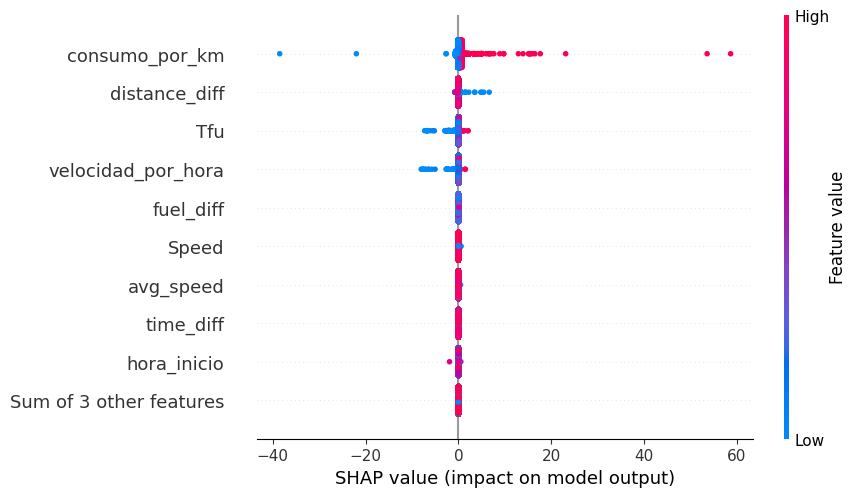

In [125]:
# SHAP para interpretar la importancia de cada variable

# Crear el explainer de SHAP
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Gráfico resumen de importancia global
shap.plots.beeswarm(shap_values)

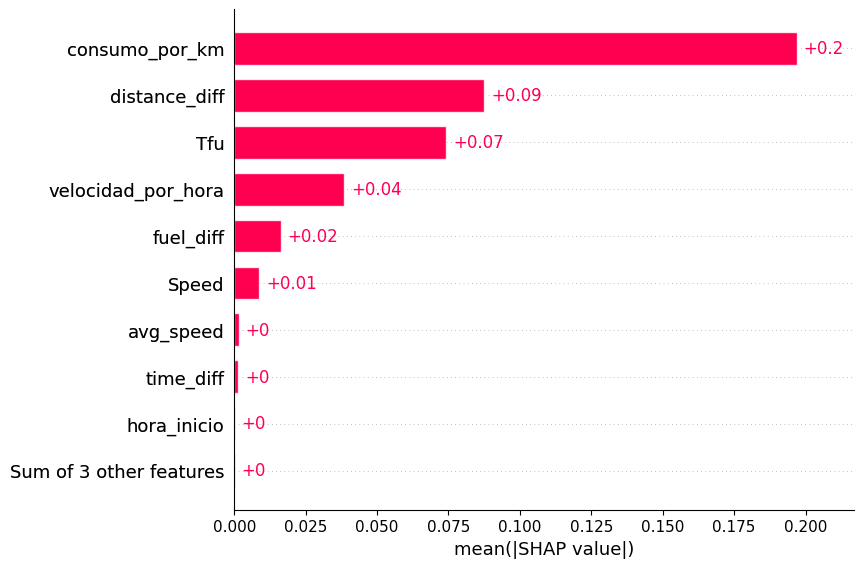

In [126]:
shap.plots.bar(shap_values)

In [ ]:
# Las tres variables más importantes son:
# 1.	consumo_por_km → +0.27 de impacto medio
# 2.	distance_diff → +0.17
# 3.	distanceMarker → +0.10

## Guardar Modelo entrenado en un Pickle

In [127]:
import pickle

# Guardar modelo
with open('modelo_gradient_boosting.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

print("Modelo guardado correctamente en 'modelo_gradient_boosting.pkl' ✅")

Modelo guardado correctamente en 'modelo_gradient_boosting.pkl' ✅


## Guardar las predicciones en un archivo .json

In [128]:
import json

# Hacer predicciones
predicciones = gb_model.predict(X_test)

# Crear lista de diccionarios con las predicciones
predicciones_dict = [
    {"real": real, "predicha": pred}
    for real, pred in zip(y_test.values, predicciones)
]

# Guardar en JSON
with open('predicciones_avg_fuel.json', 'w') as f:
    json.dump(predicciones_dict, f, indent=4)

print("Predicciones guardadas en 'predicciones_avg_fuel.json' ✅")

Predicciones guardadas en 'predicciones_avg_fuel.json' ✅
